## **Creating Scale Bars**
This notebook will provide a tutorial on creating Scale Bars for maps created using matplotlib/pyplot

### **Set-Up**

In [1]:
# Packages used by this tutorial
import geopandas # manipulating geographic data
import numpy # creating arrays
import pygris # easily acquiring shapefiles from the US Census
import matplotlib.pyplot # visualization

In [ ]:
# Downloading the state-level dataset from pygris
states = pygris.states(cb=True, year=2022, cache=False).to_crs(3857)

In [3]:
# Importing the main package
from matplotlib_map_utils.core.scale_bar import ScaleBar, scale_bar
# from matplotlib_map_utils.core import ScaleBar, scale_bar # also valid
# from matplotlib_map_utils import ScaleBar, scale_bar # also valid

In [4]:
# This is just a function to create a new, blank map with matplotlib, with our default settings
def new_map(rows=1, cols=1, figsize=(5,5), dpi=150, ticks=False):
    # Creating the plot(s)
    fig, ax = matplotlib.pyplot.subplots(rows,cols, figsize=figsize, dpi=dpi)
    # Turning off the x and y axis ticks
    if ticks==False:
        if rows > 1 or cols > 1:
            for a in ax.flatten():
                a.set_xticks([])
                a.set_yticks([])
        else:
            ax.set_xticks([])
            ax.set_yticks([])
    # Returning the fig and ax
    return fig, ax

### **Using the** `scale_bar()` **function**
The quickest and easiest way to add a scale bar to a single plot is using the `scale_bar()` function (note: I know that the text looks out of proportion with the bar, I will show you had to change that later in this howto)

One note: your desired DPI *must* be set upon creation of the subplots/axes (e.x., when calling `matplotlib.pyplot.subplots(... dpi=###)`), and *not* changed when saving the figure (e.x. when calling `matplotlib.pyplot.savefig(... dpi=###)`). This is because the scale bar is rasterized to match the current DPI of the figure upon creation - changing it later will mess up the scale and make the bar blurry (see [this issue](https://github.com/moss-xyz/matplotlib-map-utils/issues/7) for more details).

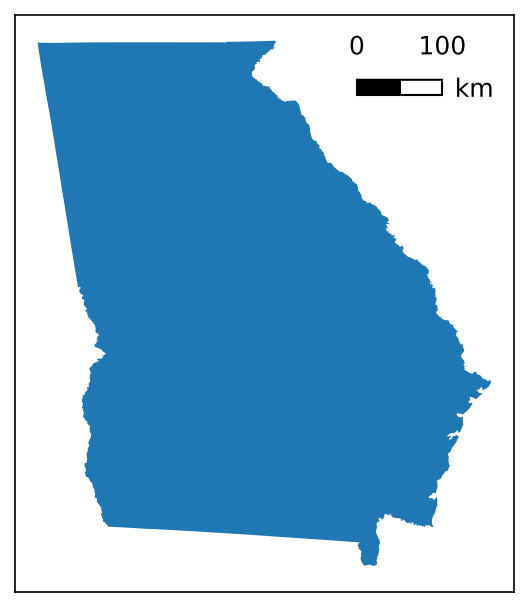

In [5]:
# Setting up a plot
fig, ax = new_map()
# Plotting a state (Georgia)
states.query("NAME=='Georgia'").plot(ax=ax)
# Adding a scale_bar to the upper-right corner of the axis - note that bar['projection'] MUST be set for this to work
scale_bar(ax=ax, location="upper right", style="boxes", bar={"projection":3857,"minor_type":"none"}, labels={"style":"first_last"})

### **Using the** ``ScaleBar`` **class**
Alternatively, a `ScaleBar` class (based on `matplotlib.artist.Artist`) is also provided that allows the same bar to be rendered like so:

One note: your desired DPI *must* be set upon creation of the subplots/axes (e.x., when calling `matplotlib.pyplot.subplots(... dpi=###)`), and *not* changed when saving the figure (e.x. when calling `matplotlib.pyplot.savefig(... dpi=###)`). This is because the scale bar is rasterized to match the current DPI of the figure upon creation - changing it later will mess up the scale and make the bar blurry (see [this issue](https://github.com/moss-xyz/matplotlib-map-utils/issues/7) for more details).

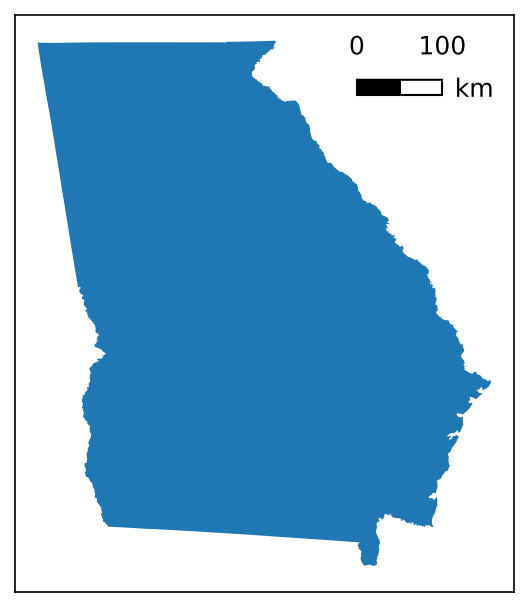

In [6]:
# Setting up a plot
fig, ax = new_map()
# Plotting a state (Georgia)
states.query("NAME=='Georgia'").plot(ax=ax)
# Creating a ScaleBar object that we want to place in the upper-right corner of the axis, 
# Note that here, we do not specify the axis
sb = ScaleBar(location="upper right", style="boxes", bar={"projection":3857,"minor_type":"none"}, labels={"style":"first_last"})
# The ScaleBar can then be added using add_artist(), which calls its built-in draw() function:
ax.add_artist(sb)

#### **Re-using Objects**
The benefit of the ScaleBar object is that it can be re-used across multiple plots without copy-pasting the function call. This is particularly beneficial for highly-customized bars: you can simply set it up once, and then add it to each axis you want.

The caveat to this is that instead of using `ax.add_artist(ScaleBar)`, you have to use `ax.add_artist(ScaleBar.copy())`; as matplotlib does not let you add the same artist to multiple axes, you have to add a *copy* of the artist.

ValueError: Can not reset the Axes. You are probably trying to reuse an artist in more than one Axes which is not supported

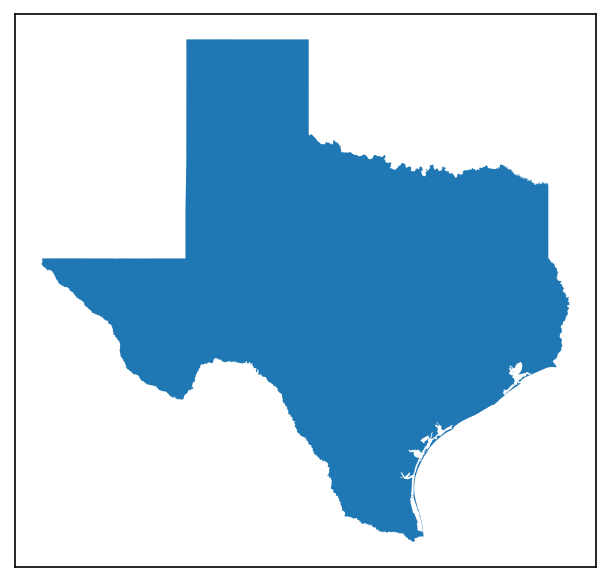

In [7]:
# Setting up a plot
fig, ax = new_map()
# Plotting a new state (Texas)
states.query("NAME=='Texas'").plot(ax=ax)
# Trying to re-use the same artist - this will throw an error
ax.add_artist(sb)

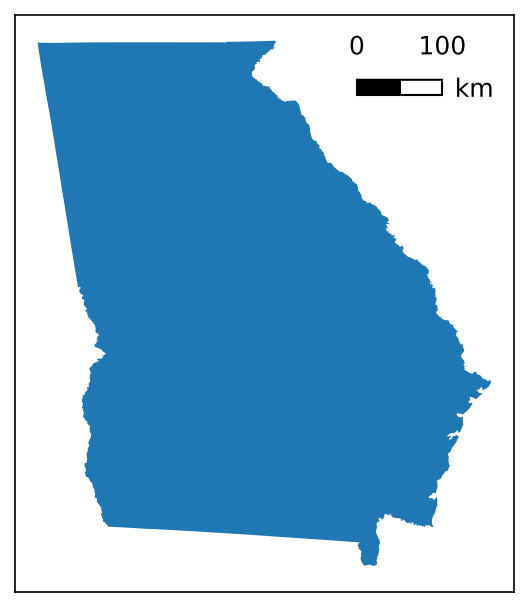

In [8]:
# Instead we have to do this
fig, ax = new_map()
states.query("NAME=='Georgia'").plot(ax=ax)
sb = ScaleBar(location="upper right", style="boxes", bar={"projection":3857,"minor_type":"none"}, labels={"style":"first_last"})
# Note that you have to use .copy() here too!
ax.add_artist(sb.copy())

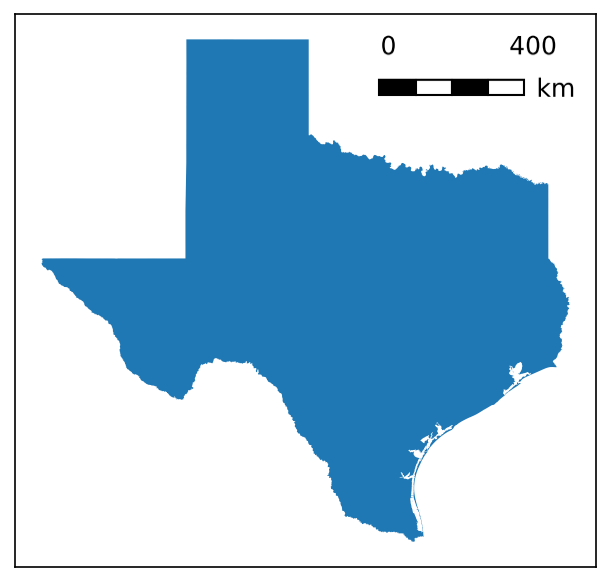

In [9]:
# Now we can do this
fig, ax = new_map()
states.query("NAME=='Texas'").plot(ax=ax)
# Using .copy() again will work this time
# Note as well that the bar is not an exact copy of the one above - it auto-adjusts to your new plot, re-using the same high-level settings
ax.add_artist(sb.copy())

#### **Updating Class Objects**
The customization options of the ScaleBar can be accessed using dot notation (like sb.base, sb.label, etc.). They can also be updated from this dot notation by passing a valid style dictionary (see next section for details).

In [10]:
# Showing the labels style options
sb.labels

{'style': 'first_last'}

In [11]:
# Updating the label style option for "loc"
sb.labels = {"loc":"above"}
sb.labels

{'style': 'first_last', 'loc': 'above'}

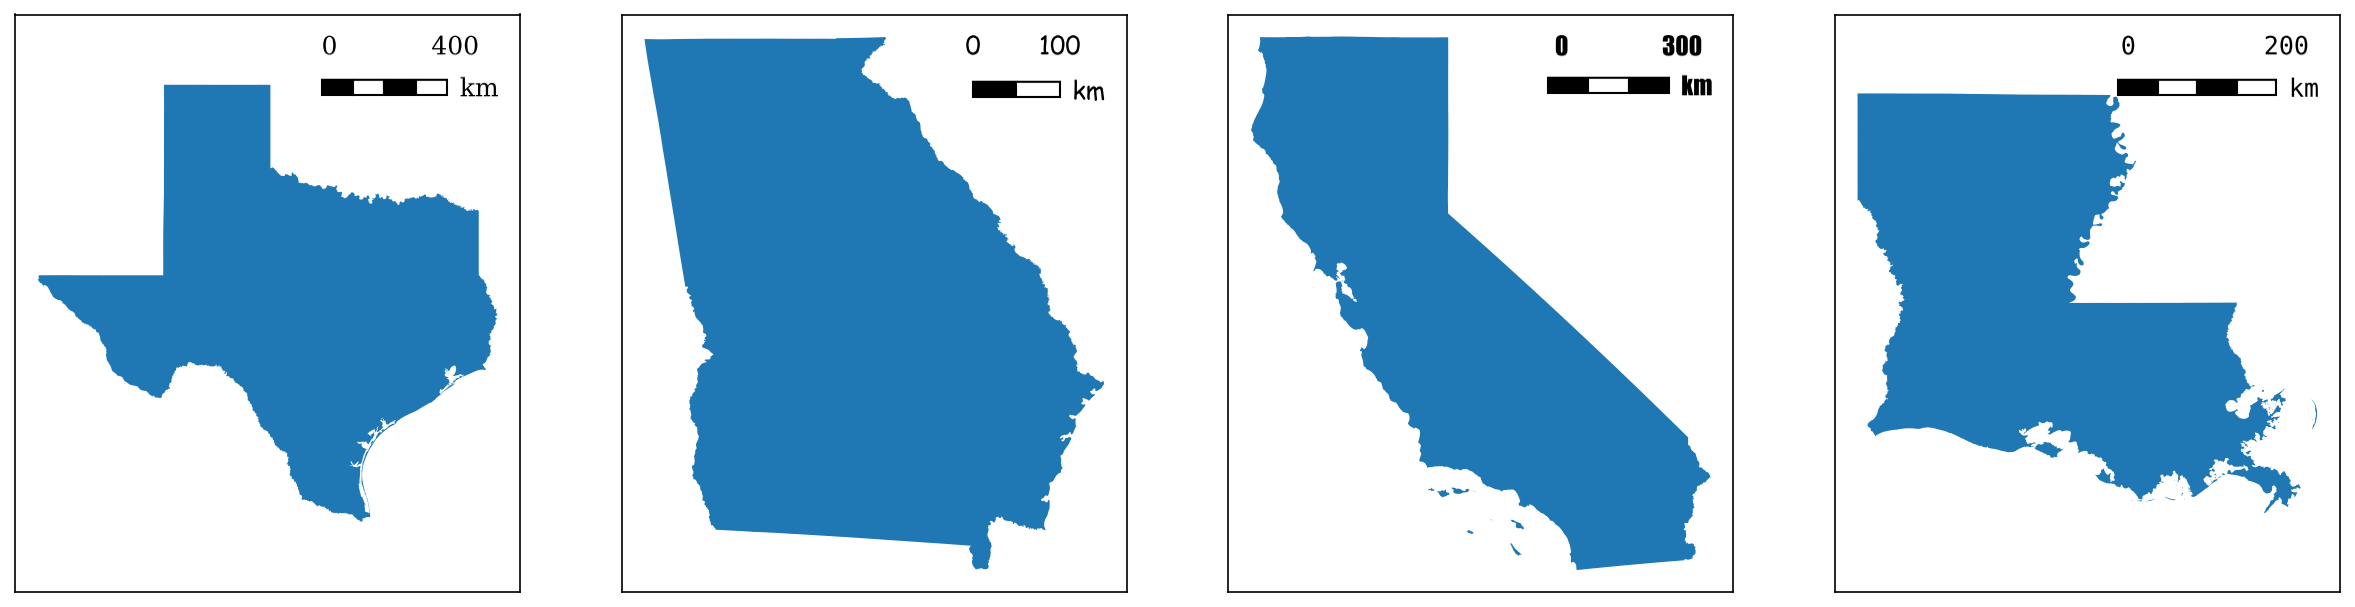

In [12]:
# This allows you to do something like so:
shapes = ["Texas","Georgia","California","Louisiana"]
families = ["serif", "cursive", "fantasy", "monospace"]
# Creating the inital bar
sb = ScaleBar(location="upper right", style="boxes", bar={"projection":3857,"minor_type":"none"}, labels={"style":"first_last"})
# Creating four subplots
fig, axs = new_map(1,4, figsize=(20,5))
for ax,s,f in zip(axs.flatten(), shapes, families):
    states.query(f"NAME=='{s}'").plot(ax=ax)
    ax.set_aspect(1, adjustable="datalim")
    sb.text = {"fontfamily":f}
    ax.add_artist(sb.copy())

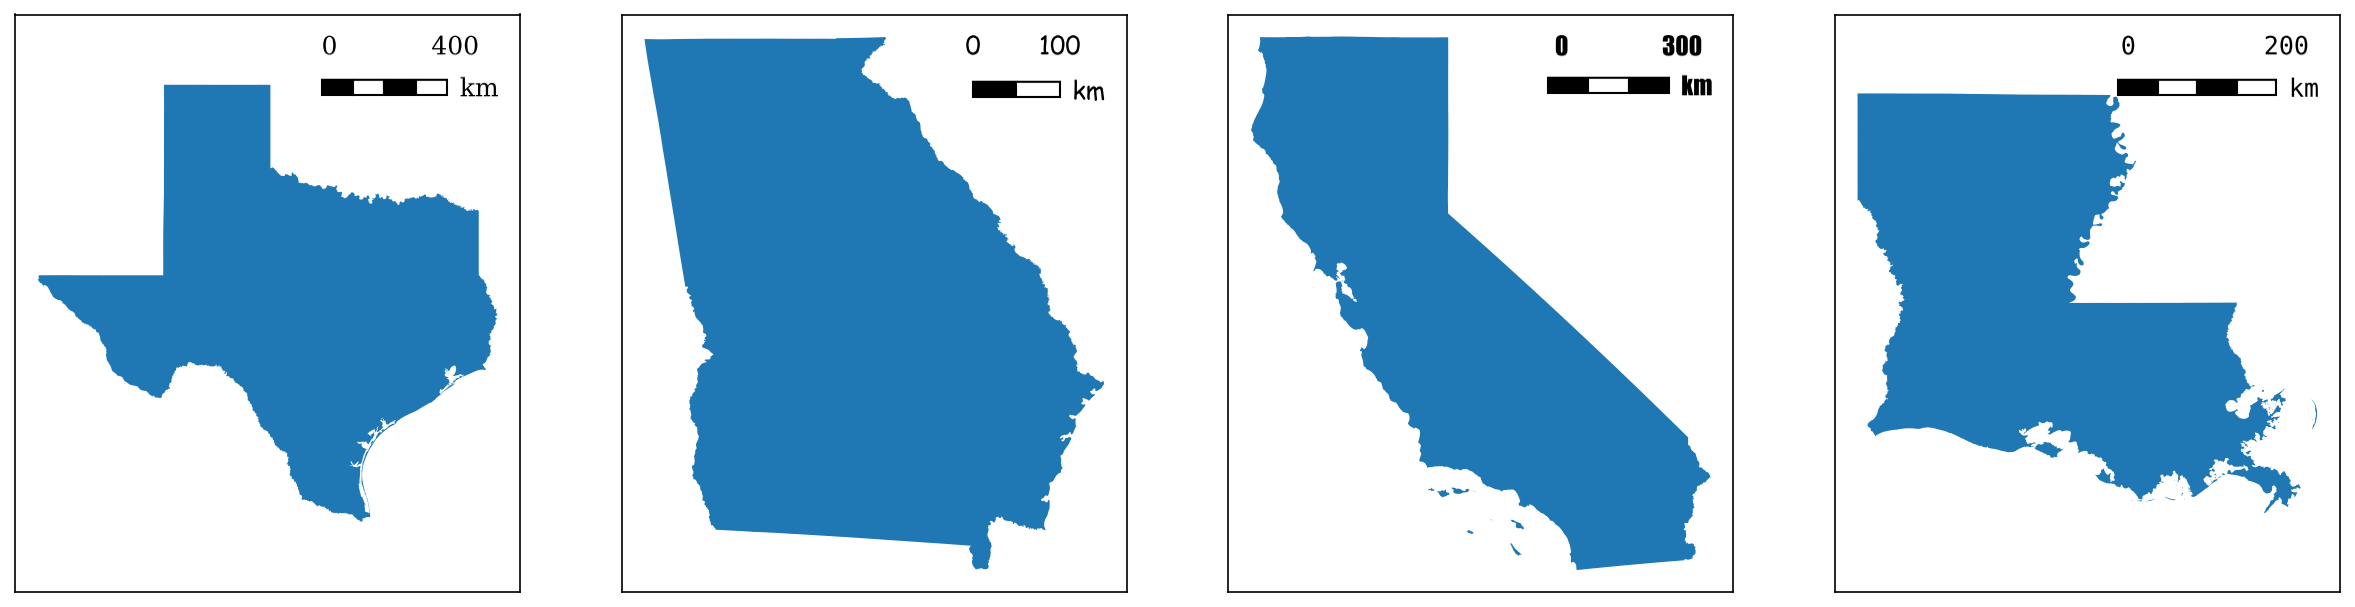

In [13]:
# Though for this specific example, you could accomplish the same with the scale_bar() function just as (more?) easily
shapes = ["Texas","Georgia","California","Louisiana"]
families = ["serif", "cursive", "fantasy", "monospace"]
# Creating four subplots
fig, axs = new_map(1,4, figsize=(20,5))
for ax,s,f in zip(axs.flatten(), shapes, families):
    states.query(f"NAME=='{s}'").plot(ax=ax)
    ax.set_aspect(1, adjustable="datalim")
    scale_bar(ax=ax, location="upper right", style="boxes", bar={"projection":3857,"minor_type":"none"}, labels={"style":"first_last"}, text={"fontfamily":f})

### **Customizing the Scale Bar**
Both the functional and object-oriented approach use the same primative style dictionaries, so you can treat the following information as valid for both

#### **Specifying Length of the Scale Bar**

There are three main ways of specifying the length of a scale bar, which utilizes the `bar` argument of the construction function or class method (see under _Visible Components_, below):

- `length` is used to set the total length of the bar, either in _inches_ (for values >= 1) or as a _fraction of the axis_ (for values < 1).
  - The default value of the scale bar utilizes this method, with a `length` value of `0.25` (meaning 25% of the axis).
  - It will automatically orient itself against the horizontal or vertical axis when calculating its fraction, based on the value supplied for `rotation`.
  - Note that any values here will be rounded to a "nice" whole integer, so the length will *always be approximate*; ex., if two inches is 9,128 units, your scale bar will end up being 9,000 units, and therefore a little less than two inches.
  - Values `major_div` and `minor_div` are ignored, while a value for `max` will _override_ `length`.

- `max` is used to define the total length of the bar, _in the same units as your map_, as determined by the value of `projection` and `unit`.
  - Ex: If you are using a projection in feet, and give a `max` of `1000`, your scale bar will be representative of 1,000 feet.
  - Ex: If you are using a projection in feet, but provide a value of `meter` to `unit`, and give a `max` of `1000`, your scale bar will be representative of 1,000 meters.
  - Will _override_ any value provided for `length`, and give a warning that it is doing so!
  - Values can be optionally be provided for `major_div` and `minor_div`, to subdivide the bar into major or minor segments as you desire; if left blank, values for these will be calculated automatically (see `preferred_divs` in `validation/scale_bar.py` for the values used).

- `major_mult` can be used alongside `major_div` to _derive_ the total length: `major_mult` is the _length of a **single** major division_, in the _same units as your map_ (as determined by the value of `projection` and `unit`), which is then multiplied out by `major_div` to arrive at the desired length of the bar.
  - Ex: If you set `major_mult` to 1,000, and `major_div` to 3, your bar will be 3,000 units long, divided into three 1,000 segments.
  - This is the _only_ use case for `major_mult` - using it anywhere else will result in warnings and/or errors!
  - Specifying either `max` or `length` will override this method!
  - `minor_div` can still be _optionally_ provided.

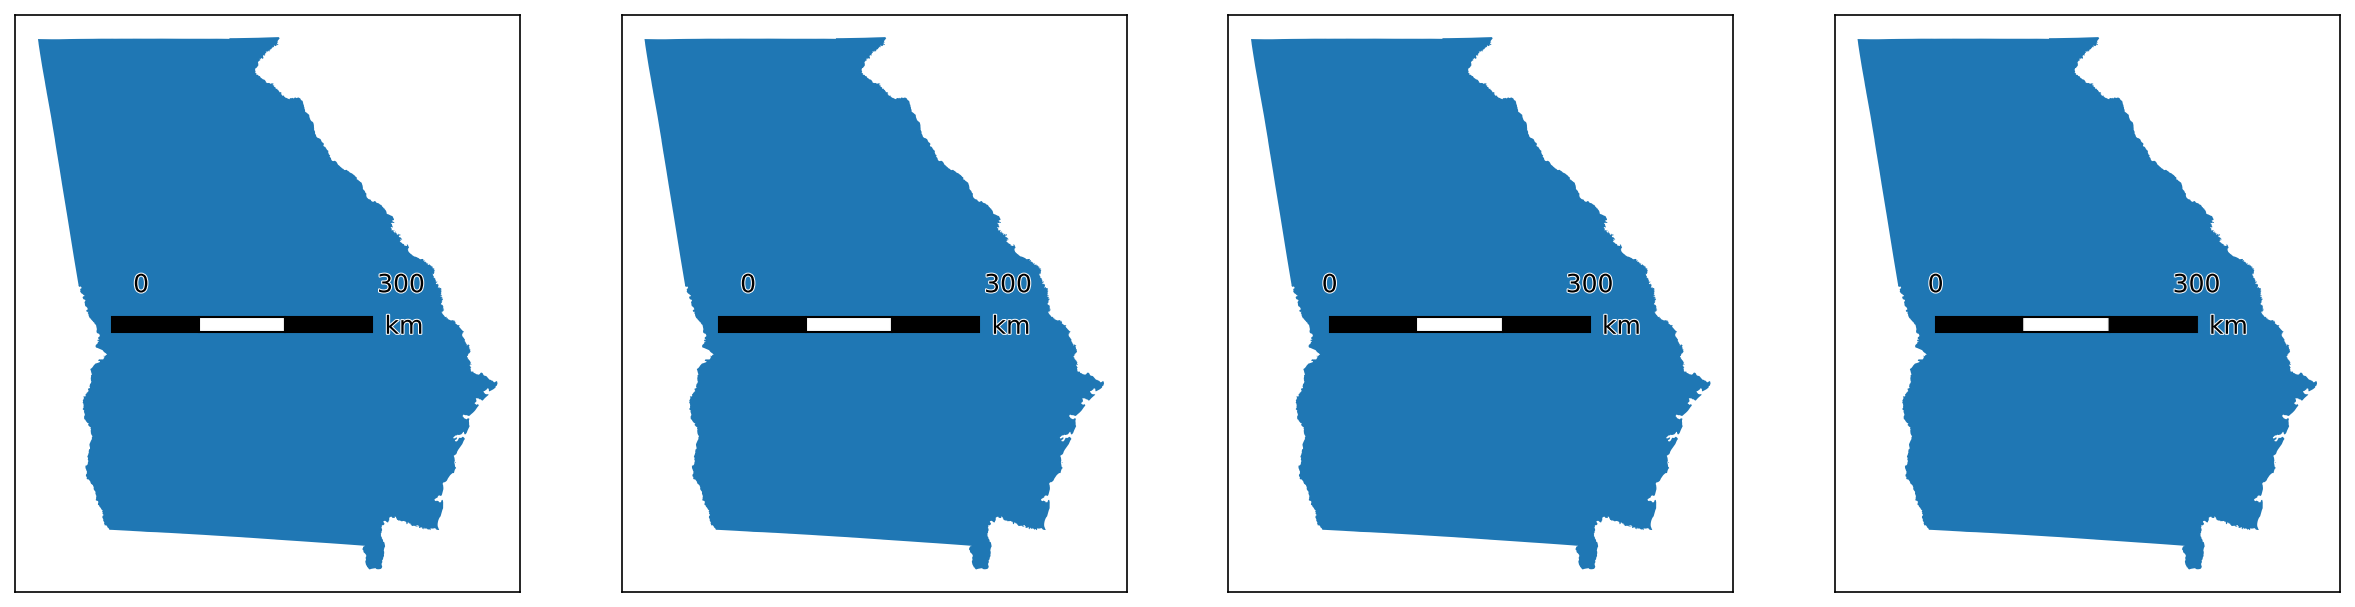

In [14]:
# Creating three identical bars using the four different methods
# Grid of location options
# Note that the "center" options will feel slightly off: this is because the the center of the scale bar is of the entire artist, text included, not just the bar itself
bar_lengths = [
    {"length":0.5}, # this bar will be ~50% of the axis
    {"length":2}, # this bar will be ~2.5 inches
    {"max":300, "major_div":3}, # this bar will be 300 km (because EPSG:3857 is in meters)
    {"major_mult":100, "major_div":3}, # this bar will be 300 km (100 * 3 = 300)
]
fig, axs = new_map(1,4, figsize=(20,5))
for ax,l in zip(axs.flatten(), bar_lengths):
    states.query(f"NAME=='Georgia'").plot(ax=ax)
    ax.set_aspect(1, adjustable="datalim")
    scale_bar(ax=ax, location="center", style="boxes", bar={"projection":3857,"minor_type":"none"} | l, labels={"style":"first_last"})

All of the above cases expect a valid CRS to be supplied to the `projection` parameter, to correctly calculate the relative size of the bar with respect to the map's underlying units. However, three _additional_ values may be passed to `projection`, to override this behavior entirely:

- If `projection` is set to `px`, `pixel`, or `pixels`, then values for `max` and `major_mult` are interpreted as being in _pixels_ (so a `max` of 1,000 will result in a bar 1,000 pixels long)

- If `projection` is set to `pt`, `point`, or `points`, then values for `max` and `major_mult` are interpreted as being in _points_ (so a `max` of 1,000 will result in a bar 1,000 points long (a point is 1/72 of an inch))

- If `projection` is set to `dx`, `custom`, or `axis`, then values for `max` and `major_mult` are interpreted as being in _the units of the x or y axis_ (so a `max` of 1,000 will result in a bar equal to 1,000 units of the x-axis (if orientated horizontally))

The intent of these additional methods is to provide an alternative interface for defining the bar, in the case of non-standard projections, or for non-cartographic use cases (in particular, this is inspired by the `dx` implementation of `matplotlib-scalebar`). However, this puts the onus on the user to know how big their bar should be - _you also cannot pass a value to `unit` to convert_! Note you _can_ provide custom label text to the bar via the `labels` and `units` arguments (ex. if you need to label "inches" or something).

#### **Primary Settings**
There are three primary settings that must be supplied each time a scale bar is created:

* `location`: where the bar will be placed relative to the plot. Will accept any of the options accepted by matplotlib for legend placement (`"upper right"`, `"center"`, `"lower left"`, etc., see *loc* in the [`matplotlib.pyplot.legend`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html) documentation). The default is `"upper right"`.

* `style`: what you want the scale bar to look like; as of now, there are two options: `"boxes"` (the default) and `"ticks"`. Note that some options change depending on what you select here!

* `zorder` (new as of `v3.1.0`): the zorder of the final scale bar artist, which can be used to bring the artist forward / place it behind other axis artists. The default value is 99.

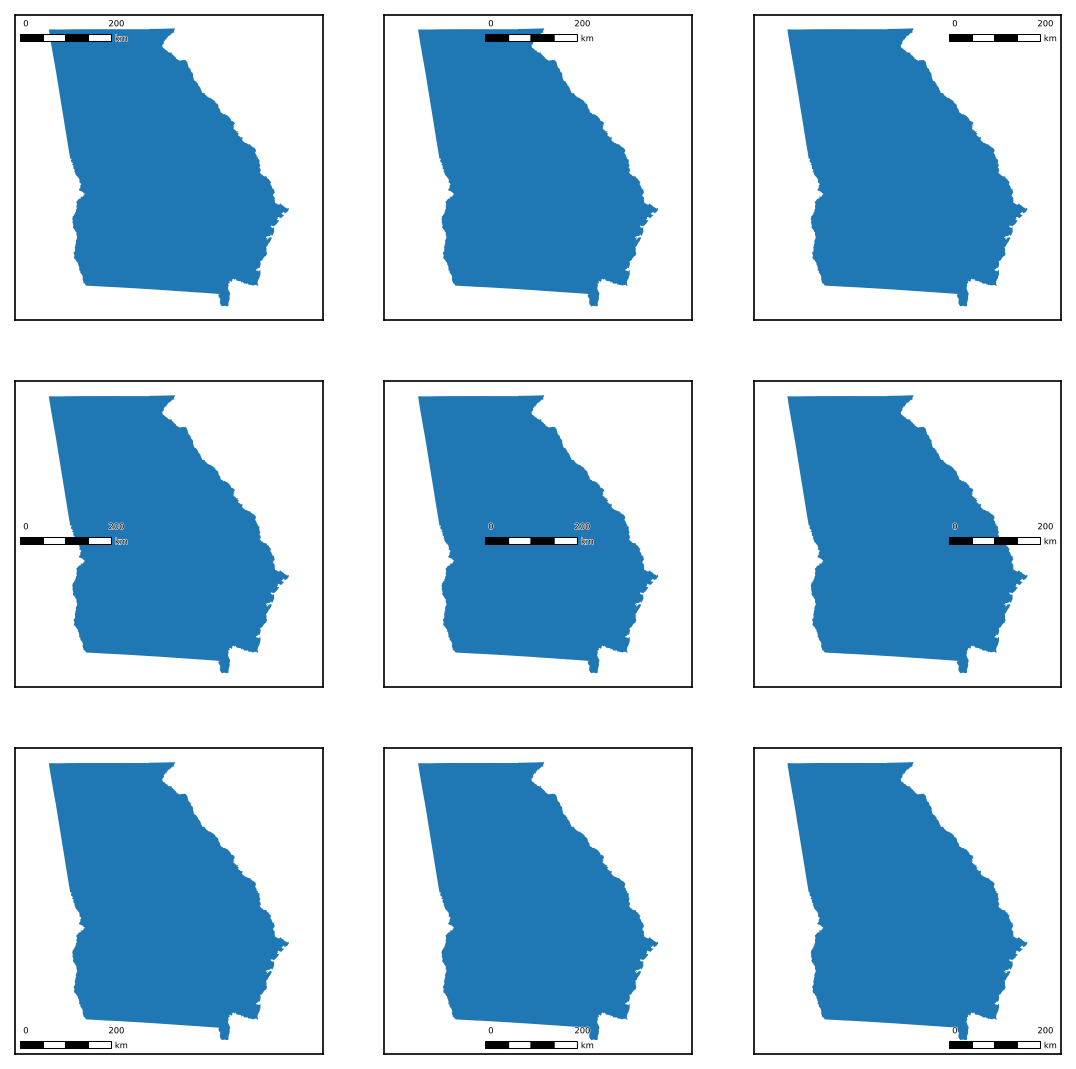

In [15]:
# Do not worry about this: I cover it later
ScaleBar.set_size("xs")
# Grid of location options
# Note that the "center" options will feel slightly off: this is because the the center of the scale bar is of the entire artist, text included, not just the bar itself
locs = ["upper left", "upper center", "upper right", "center left", "center", "center right", "lower left", "lower center", "lower right"]
fig, axs = new_map(3,3, figsize=(9,9))
for ax,l in zip(axs.flatten(), locs):
    states.query(f"NAME=='Georgia'").plot(ax=ax)
    ax.set_aspect(1, adjustable="datalim")
    scale_bar(ax=ax, location=l, style="boxes", bar={"projection":3857,"minor_type":"none"}, labels={"style":"first_last"})

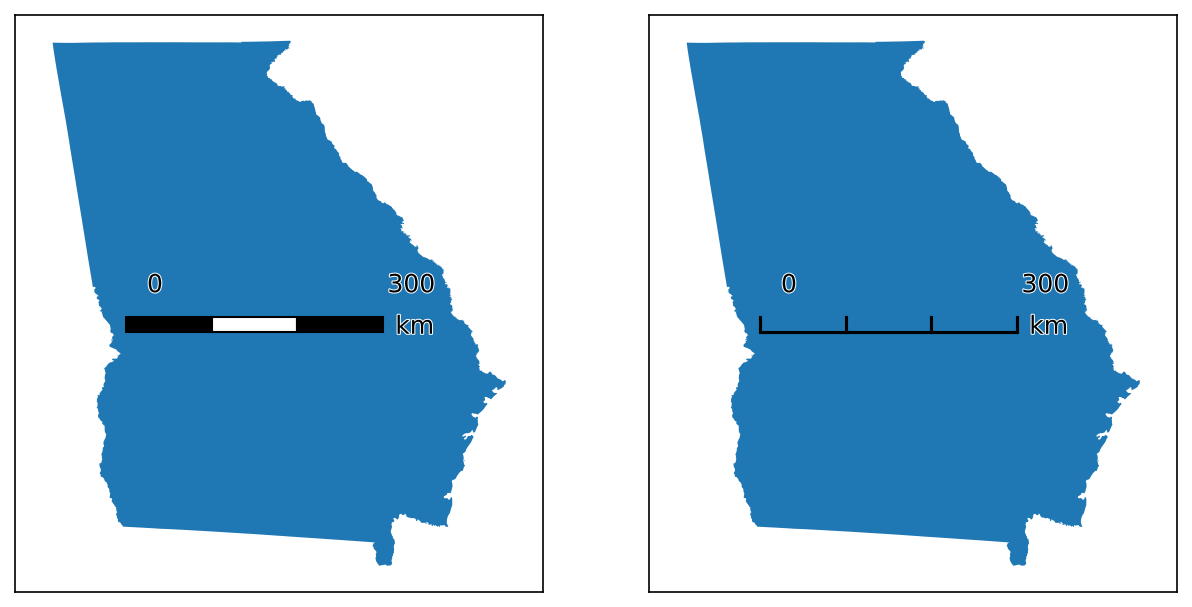

In [16]:
# Just reverting the change I made above; again this is explained later, don't worry about it for now
ScaleBar.set_size("md")
# Modifying the styles
styles = ["boxes","ticks"]
# Creating 1x2 subplots
fig, axs = new_map(1,2, figsize=(10,5))
for ax,s in zip(axs.flatten(), styles):
    states.query(f"NAME=='Georgia'").plot(ax=ax)
    ax.set_aspect(1, adjustable="datalim")
    scale_bar(ax=ax, location="center", style=s, bar={"projection":3857,"minor_type":"none","length":0.5}, labels={"style":"first_last"})

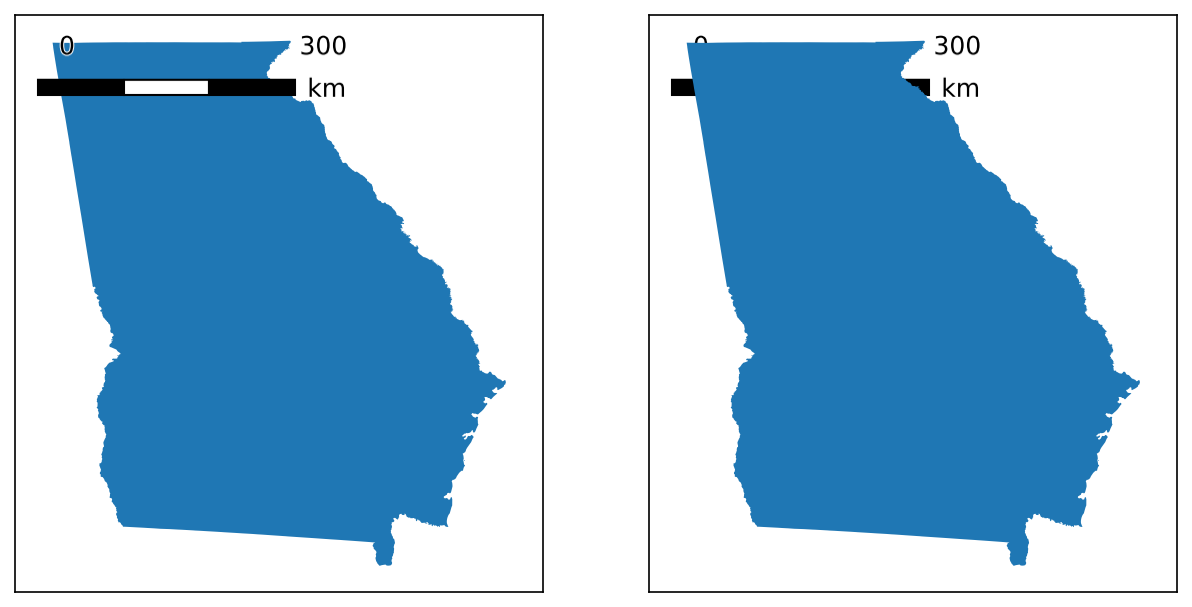

In [17]:
# An example to show changing zorders
zorders = [{"plot":5,"scale":10}, {"plot":10,"scale":5}]
# Creating four subplots
fig, axs = new_map(1,2, figsize=(10,5))
for ax,z in zip(axs.flatten(), zorders):
    states.query(f"NAME=='Georgia'").plot(ax=ax, zorder=z["plot"])
    ax.set_aspect(1, adjustable="datalim")
    scale_bar(ax=ax, location="upper left", 
              bar={"projection":3857,"minor_type":"none","length":0.5}, labels={"style":"first_last"}, zorder=z["scale"])

#### **Visible Components**
There are three "visible" components to the scale bar. Each of these is separately customizeable, but **unlike** the NorthArrow object, they **cannot** can be turned off entirely by passing a value of `False` to the function or object creation, as each component is necessary for a ScaleBar (passing `None` still uses default values).

##### **Bar**
`bar` is the most important component, and has the most customization options. 

* `projection`: **NOTE: THIS *MUST* BE SET!** (I am considering making it a top-level variable like `style` and `location`). The coordinate reference system (CRS) that the map is in. Will accept any `pyproj` CRS value (including strings and integers). Projected reference systems are preferred; unprojected ones will be approximated to metres based on the great circle distance. Some special values are accepted as well, see section entitled _Specifying Length of the Scale Bar_ (above) for details.

* `unit`: The unit of measurement that you want the scale bar to be in. If left blank, will be the same as the unit of measurement of the `projection`. Otherwise, will handle conversion between the two: useful if you are using a projection in metres and want to convert it to kilometers or feet. See `validation.scale_bar.units_standard` for acceptable values, but the following shorthand will work: `m` for meters, `ft` for feet, `km` for kilometers, `yd` for yards, `mi` for miles, `nmi` for nautical miles.

  * Note that, if left *blank*, or set to `None`, this will auto-scale meters and feet to kilometers and miles, respectively, when you *axis* is >5 kilometers or miles wide/tall. To disable this behavior, simply specify a value for this argument (i.e. `unit="ft"`).

* `rotation`: For rotating the scale bar an arbitrary number of degrees (between -360 and 360). Useful for creating a vertically-oriented scale bar.

* `max`: The max value of the scale bar, in the same units as `unit` (or `projection` if `unit` is None). If left blank, will be approximated based on the value of `length`.

* `length`: The desired length of the bar in **inches** (for values greater than 1) or as a **fraction of the axis width** (for values between 0 and 1). If left blank, will be approximated as ~25% of the axis. Note that any values set here will also be rounded for convenience: so if you want a 3 inch scale bar, but that equals 91,000 kilometers, you should expect that to be rounded down to 90,000 kilometers, and your scale bar to therefore be a little less than 3 inches.

* `height`: The desired height of the bar (cross-axis from the bar `length` regardless of orientation set by `rotation`) in **inches**. Will accept any integer. Note that for `ticks`, this will set the height of the `major` ticks (instead of the `minor` ones).

* `reverse`: Whether or not to flip the order of the bar's segments; for a "typical" scale bar, that would mean the max is on the left instead of the right. Will accept either `True` or `False`.

* `major_div`: The number of "major" divisions in the bar (see minor divisions below for the difference). Will accept any integer. Note that this can only be set alongside `max`: setting it on its own will not do anything. If left blank, will be approximated based on the `length` and `max` values.

* `major_mult`: The length of a "major" division in the bar - only used when specifying the length of the bar as a multiple of major divisions and division size (see section entitled _Specifying Length of the Scale Bar_ (above) for details). Will accept any integer. Note that this can only be used in conjunction with `major_div`: setting it on its own will not do anything.

* `minor_div`: The number of "minor" divisions *in each major division*: a bar with 2 major division and 2 minor divisions will have 4 divisions in total. Will accept any integer, but must be greater than 1 for a minor division to be visible.

* `minor_type`: Controls where minor divisions will appear. If set to `none`, will not have any minor divisions, regardless of what `minor_div` is set to. If set to `first`, then only the first *major* division will be subdivided: the rest will be intact. If set to `all`, *all* major divisions will be subdivided.

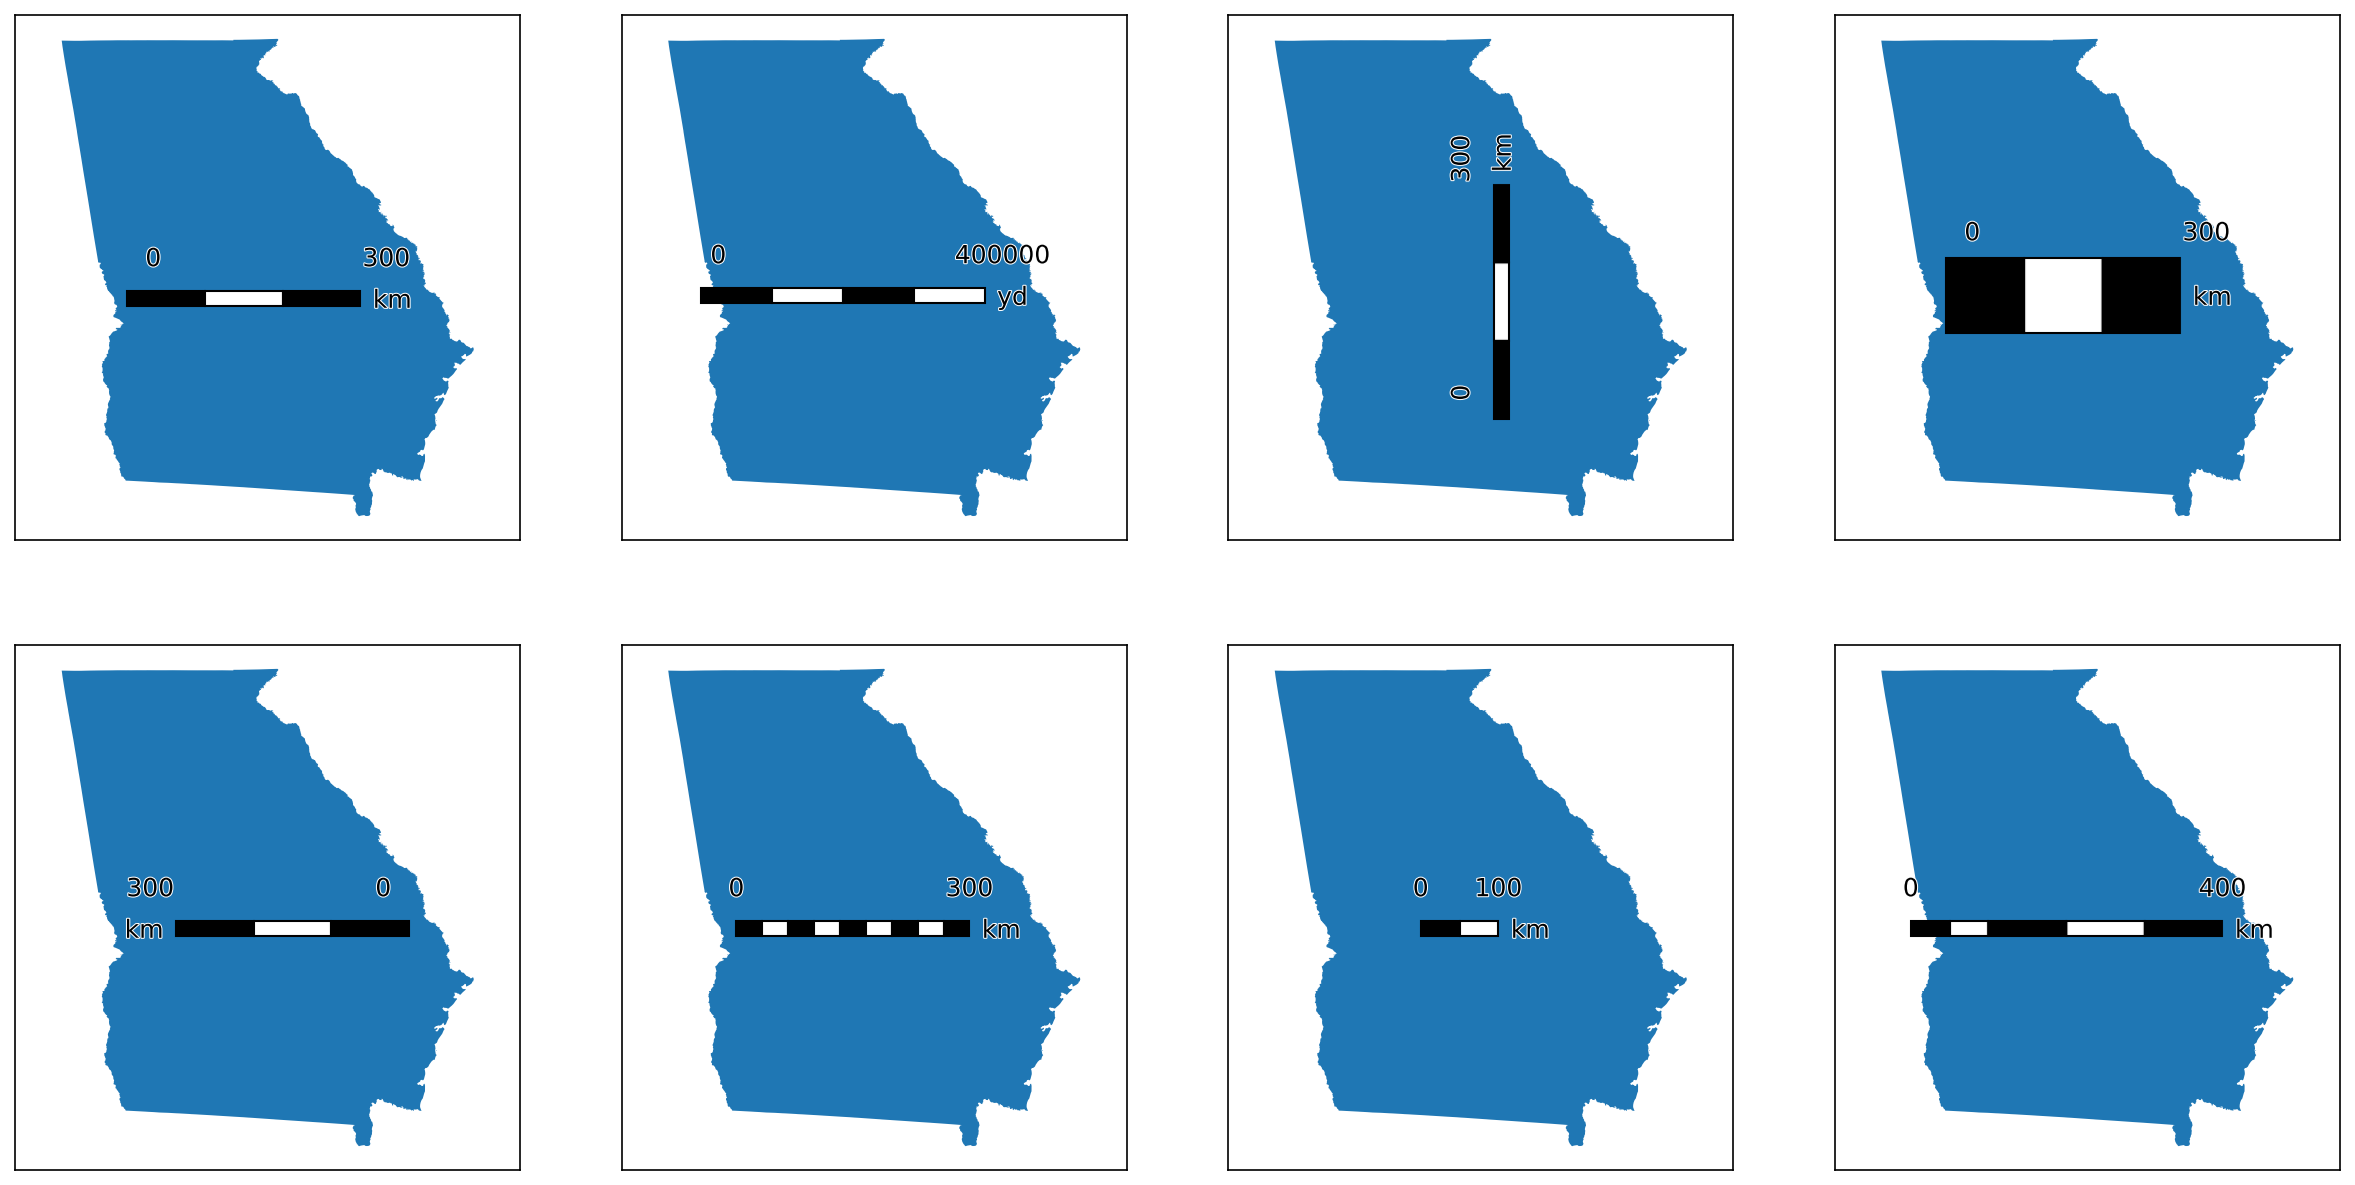

In [18]:
# Modifying specific elements
modifications = [
    {}, # default settings for comparison
    {"unit":"yd"}, # converting units
    {"rotation":90}, # making the bar vertical
    {"height":0.5}, # increasing the height
    {"reverse":True}, # reversing the order of the bar
    {"minor_type":"all"}, # adding minor divisions
    {"length":0.2}, # shortening the bar
    {"length":None,"max":400,"major_div":4,"minor_div":2,"minor_type":"first"}, # setting all the bar divisions
]
# Creating 2x4 subplots
fig, axs = new_map(2,4, figsize=(20,10))
for ax,m in zip(axs.flatten(), modifications):
    states.query(f"NAME=='Georgia'").plot(ax=ax)
    ax.set_aspect(1, adjustable="datalim")
    scale_bar(ax=ax, location="center", style="boxes", labels={"style":"first_last"},
              bar={"projection":3857,"minor_type":"none","length":0.5} | m) # this line just concatenates the two dictionaries together

These next three are only valid options when `style` is set to `"boxes"`:

* `facecolors`: the color(s) of the division on the bar. Will accept any matplotlib color value. If a single value is passed, it will be used for all divisions. If a list is passed, it will be extended via cycling to the appropriate length (based on the number of division in the bar) if shorter, or it will be truncated, if longer.

* `edgecolors`: the color(s) of the edges of the divisions on the bar. Will accept any matplotlib color value. If a single value is passed, it will be used for all divisions. If a list is passed, it will be extended via cycling to the appropriate length (based on the number of division in the bar) if shorter, or it will be truncated, if longer.

* `edgewidth`: the width of the edge of the divisons. Will accept any positive float or integer. Only a singular value may be passed.

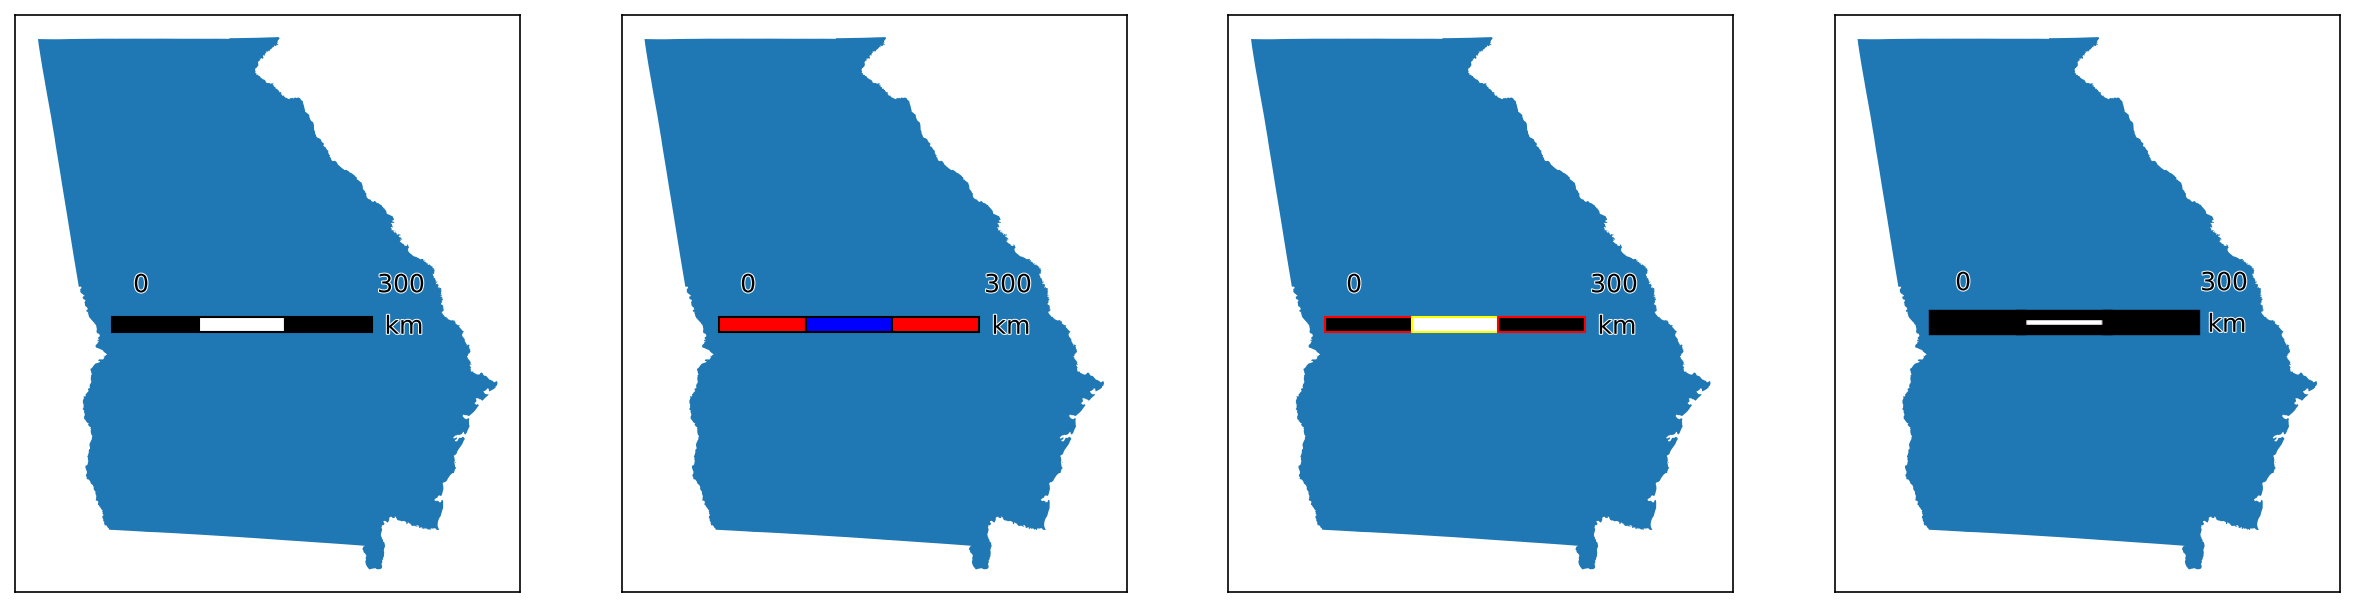

In [19]:
# Modifying specific elements
modifications = [
    {}, # default settings for comparison
    {"facecolors":["red","blue"]}, # changing the colors of the divisions
    {"edgecolors":["red","yellow"]}, # changing the colors of the edges
    # NOTE: I do think this changes the length of the bar which I don't love, so large values not recommended (relative to plot size)
    {"edgewidth":5}, # changing the width of the edges 
]
# Creating 1x4 subplots
fig, axs = new_map(1,4, figsize=(20,5))
for ax,m in zip(axs.flatten(), modifications):
    states.query(f"NAME=='Georgia'").plot(ax=ax)
    ax.set_aspect(1, adjustable="datalim")
    scale_bar(ax=ax, location="center", style="boxes", labels={"style":"first_last"},
              bar={"projection":3857,"minor_type":"none","length":0.5} | m) # this line just concatenates the two dictionaries together

These next five are only valid options when `style` is set to `"ticks"`:

* `minor_frac`: the height of the `minor` ticks, as a *fraction of the height of the major ticks* (set by `height`); a value of `0.5` will create minor ticks half the height of the major ticks.

* `tick_loc`: the position of the ticks relative to the base bar. Can be any of `above`, `below`, or `middle` (if ticks should intersect the bar midway).

* `basecolors`: the color(s) of the segments that comprise the "base" of the scale bar. Will accept any matplotlib color value. If a single value is passed, it will be used for all divisions. If a list is passed, it will be extended via cycling to the appropriate length (based on the number of division in the bar) if shorter, or it will be truncated, if longer.

* `tickcolors`: the color(s) of the ticks marking the scale bar. Will accept any matplotlib color value. If a single value is passed, it will be used for all divisions. If a list is passed, it will be extended via cycling to the appropriate length (based on the number of division in the bar) if shorter, or it will be truncated, if longer.

* `tickwidth`: the width of the base bar and ticks. Will accept any positive float or integer. Only a singular value may be passed.

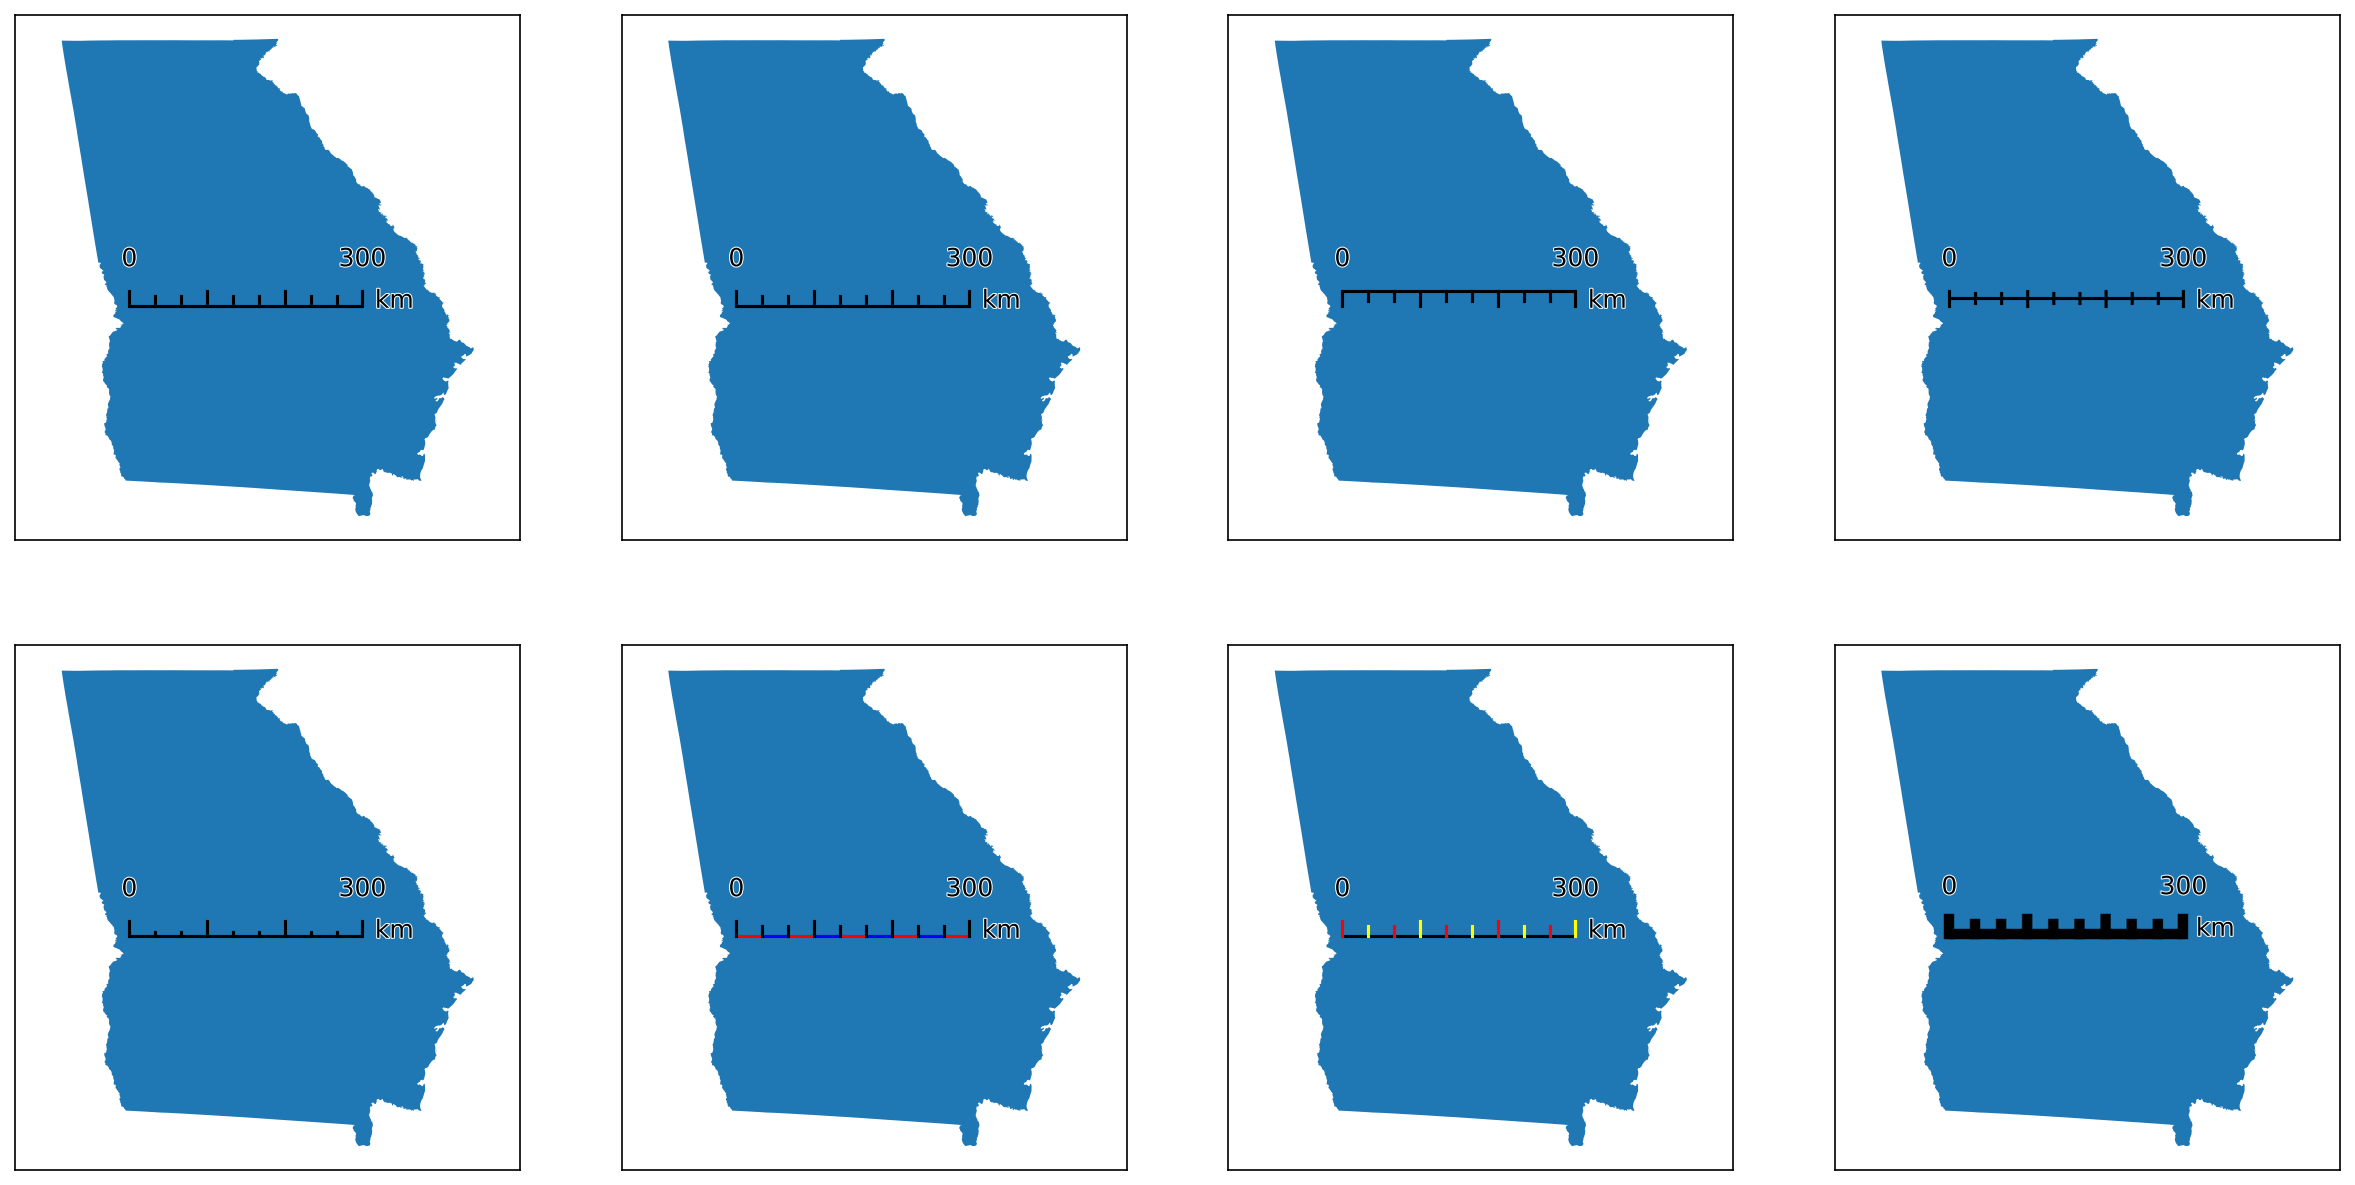

In [20]:
# Modifying specific elements
modifications = [
    {}, # default settings for comparison
    # Iterating through the three tick locations
    {"tick_loc":"above"},
    {"tick_loc":"below"},
    {"tick_loc":"middle"},
    # Iterating through the other settings
    {"minor_frac":0.25}, # the default value is 0.66
    {"basecolors":["red","blue"]}, # changing the colors of the divisions
    {"tickcolors":["red","yellow"]}, # changing the colors of the edges
    {"tickwidth":5}, # changing the width of the edges 
]
# Creating 2x4 subplots
fig, axs = new_map(2,4, figsize=(20,10))
for ax,m in zip(axs.flatten(), modifications):
    states.query(f"NAME=='Georgia'").plot(ax=ax)
    ax.set_aspect(1, adjustable="datalim")
    scale_bar(ax=ax, location="center", style="ticks", labels={"style":"first_last"},
              bar={"projection":3857,"minor_type":"all","length":0.5} | m) # this line just concatenates the two dictionaries together

##### **Labels**
`labels` modifies the text that appears on the divisions of the scale bar (i.e. not including the units text).

* `labels`: An override for the label text. Works in tandem with `style` - the number of labels provided should match the number expected based on the `style`. If `None` are passed, the labels will be auto-generated based on the `format` and `format_int` arguments. Default is `None`.

  * *Will also accept a list of `True` and `False` values instead, which will show/hide the relevant auto-generated labels.*

* `format`: A format string that can be passed to format the auto-generated labels, if `labels` is `None`. Note: do *not* pass the leading semicolon (i.e. if you want to format with three decimal points, just pass `.3f`). Default is two decimals (`.2f`).

* `format_int`: If `True`, will format "round" floats as integers, by removing their trailing decimals. If `False`, will apply the `format` string to them. Default is `True`.

* `style`: Controls *which* labels are placed. 
    * If `major`, labels will be placed on each major division, regardless of if minor divisions exist (# labels = `major_div` + 1). 
    * If `first_last`, labels will be placed on the first (0) and last major division (# labels = 2). 
    * If `last_only`, labels will be placed exclusively on the last major division (# labels = 1).
    * If `minor_all`, labels will be placed on each major *and* minor division, for each minor division that exists (# labels = `major_div * minor_div + 1`).
    * If `minor_first`, labels will be placed on each major division, and the first (and *only* the first) minor division (# labels = `major_div + 2`).

* `loc`: Controls *where* labels are placed. If `above`, labels will be placed above the bar; if `below`, labels will be placed below.

* `fontsize`: The size of the text. Will accept any float, int, or string value (such as `small` or `xx-large`) - see matplotlib documentation for more details.

* `textcolors`: the color of the main text. Will accept any matplotlib color value as either a single value or a list to be cycled across all the text values.

* `fontfamily`: The appearance of the text - see matplotlib documentation for more details. Can be any of `serif`, `sans-serif`, `cursive`, `fantasy`, or `monospace`.

* `fontstyle`: The appearance of the text - see matplotlib documentation for more details. Can be any of `normal`, `italic`, or `oblique`.

* `fontweight`: The appearance of the text - see matplotlib documentation for more details. Can be any of `normal`, `bold`, `heavy`, `light`, `ultrabold`, or `ultralight`.

* `stroke_width`: The width of the outline of the text. Will accept any positive float or integer.

* `stroke_color`: The color of the outline of the text. Will accept any matplotlib color value.

* `rotation`: The rotation of the text in-place, expressed in degrees. Accepts values between -360 and 360. Works in tandem with `rotation_mode` (below).

* `rotation_mode`: Changes how the rotation of the text occurs. Recommend looking at matplotlib's documentation for details. Can be either `anchor` or `default`.

* `sep`: The amount of padding between the labels and the bar, in points. Will accept any positive float or integer.

* `pad`: The amount of padding around the combined bar and label text, in points. Will accept any positive float or integer. *Note that this is usually kept at 0, as the change is a little nuanced.*

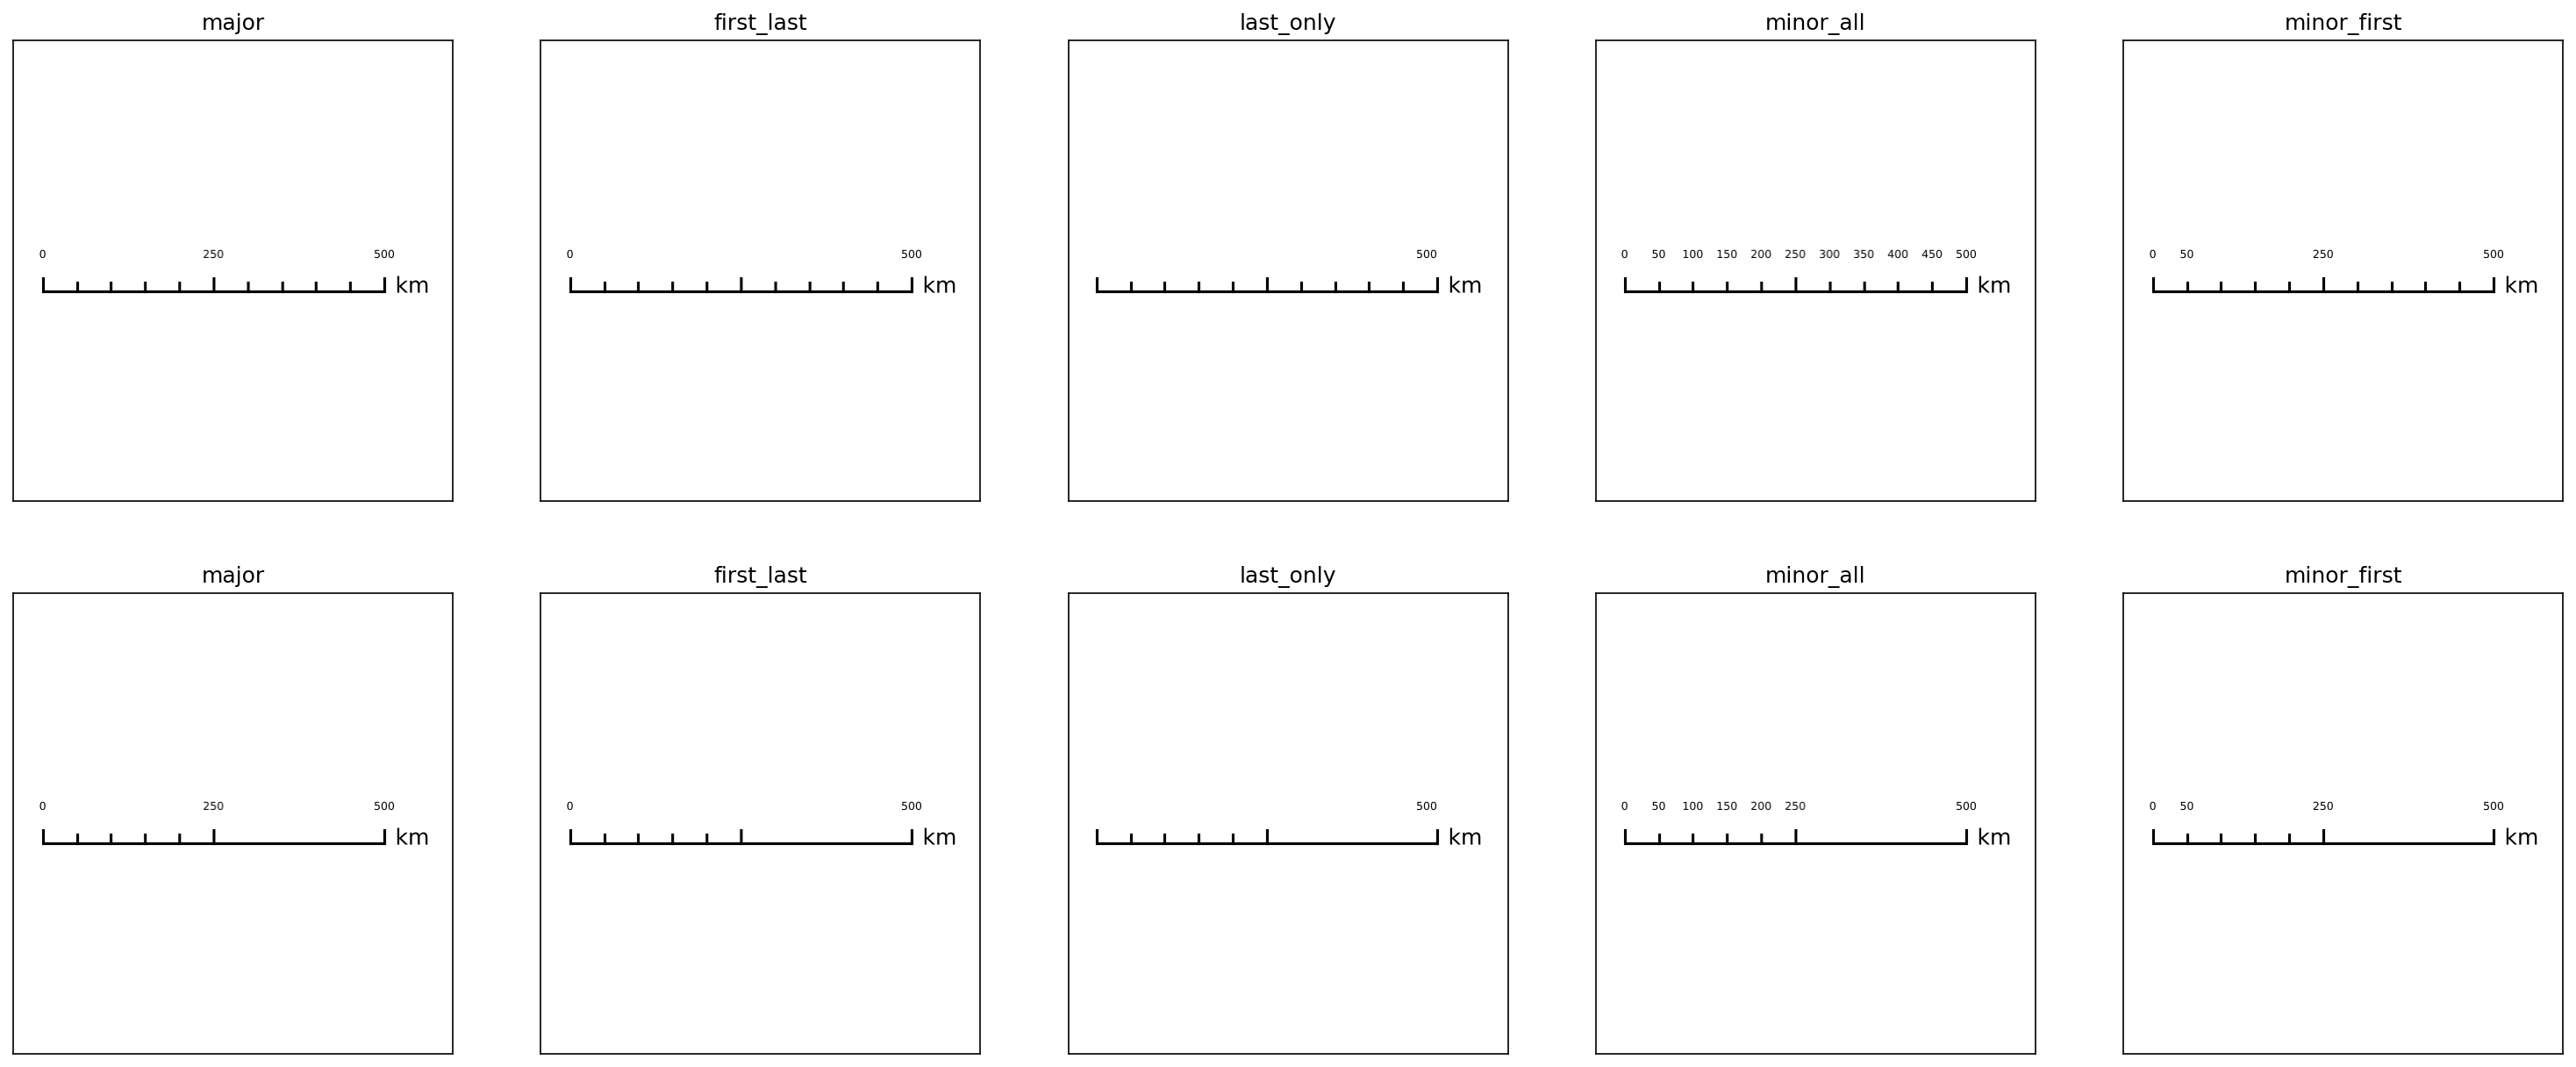

In [21]:
# This block will show the different label combinations
# Creating 2x5 subplots
fig, axs = new_map(2,5, figsize=(25,10))
# Now we define the different label settings
modifications = [
    # Iterating through the label styles
    {"style":"major"},
    {"style":"first_last"},
    {"style":"last_only"},
    {"style":"minor_all"},
    {"style":"minor_first"},
]
# We'll first iterate through each of the two minor_types
for axc,t in zip(axs, ["all","first"]):
    for ax,m in zip(axc, modifications):
        states.query(f"NAME=='Georgia'").plot(ax=ax, color="white")
        ax.set_aspect(1, adjustable="datalim")
        scale_bar(ax=ax, location="center", style="ticks", labels={"fontsize":6} | m, # NOTE: I shrunk this text just to make it more visible
                  bar={"projection":3857,"max":500,"major_div":2,"minor_div":5,"minor_type":t})
        ax.set_title(m["style"])

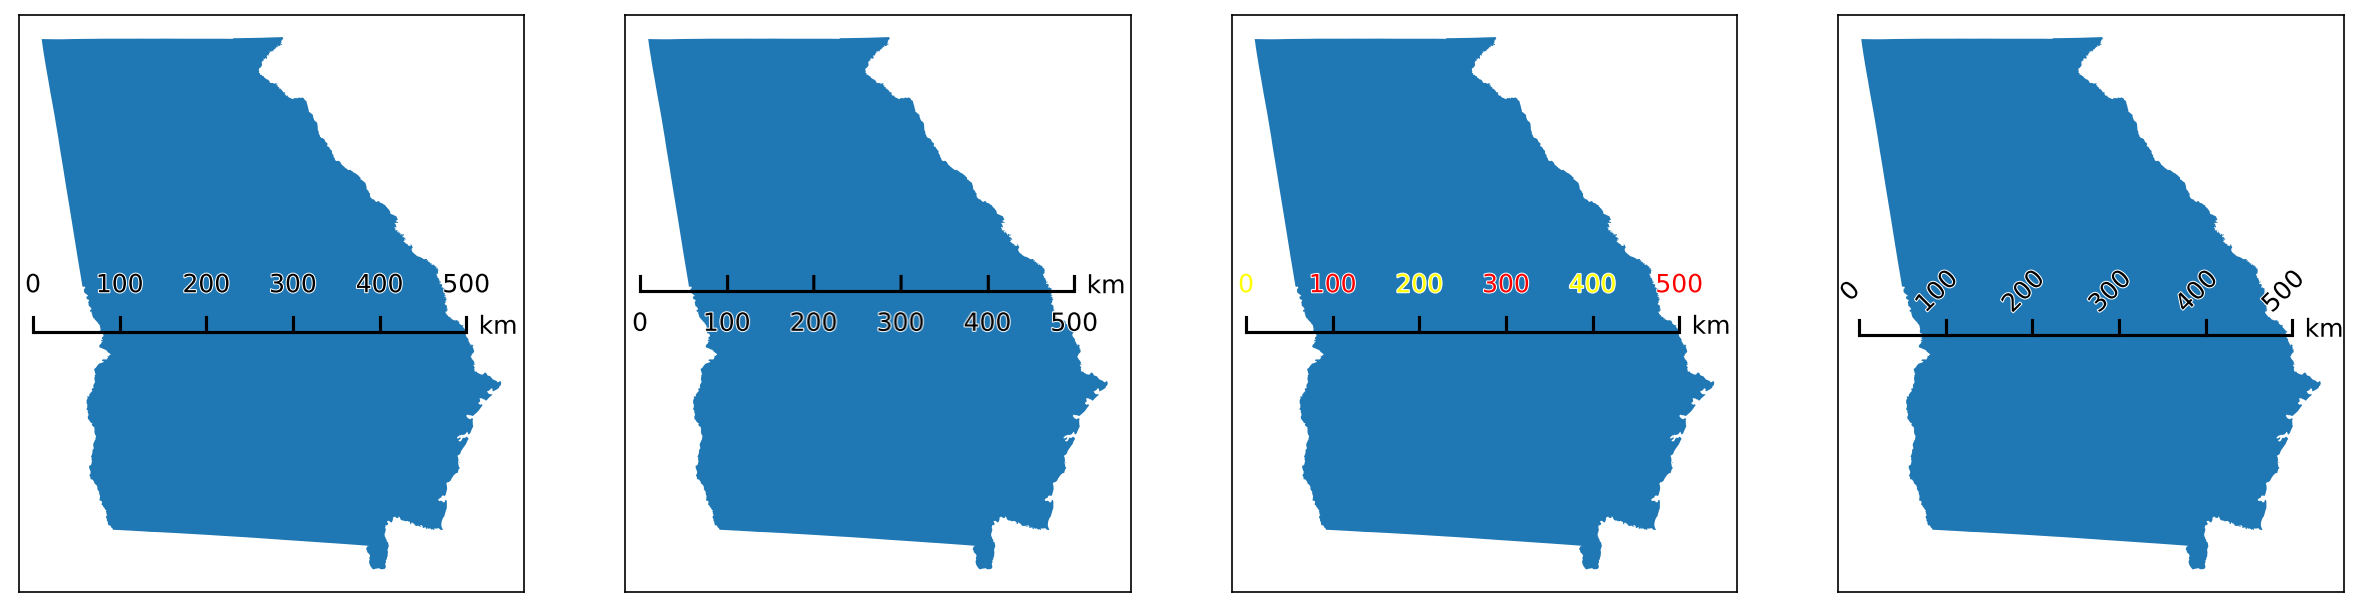

In [22]:
# Modifying other elements
modifications = [
    {"loc":"above"},
    {"loc":"below"},
    {"textcolors":["yellow","red"]},
    {"rotation":45}, # changing the colors of the divisions
]
# Creating 1x4 subplots
fig, axs = new_map(1,4, figsize=(20,5))
for ax,m in zip(axs.flatten(), modifications):
    states.query(f"NAME=='Georgia'").plot(ax=ax)
    ax.set_aspect(1, adjustable="datalim")
    scale_bar(ax=ax, location="center", style="ticks", labels={"style":"major"} | m, # changed the style to major here
              bar={"projection":3857,"max":500,"major_div":5,"minor_div":1,"minor_type":t}) 

##### **Units**
`units` modifies the units *label* for the scale bar - it does not change the units of the scale bar itself, as that is instead controlled by `bar["unit"]`. By default, it uses the shorthand of the units of the scale bar (`m` for meters, `ft` for feet, etc.), but this can be manually overridden.

* `label`: An override for the default label text. Will accept any string.

* `loc`: Controls *where* the label is placed. If `bar`, the units labels will be placed in line with the bar (this is the default); if `text`, the label will be appended to the last label; if `opposite`, will appear on the opposite side of the bar from the last label.

The following settings are only relevant if `loc` is *not* equal to `text`:

* `fontsize`: The size of the text. Will accept any float, int, or string value (such as `small` or `xx-large`) - see matplotlib documentation for more details.

* `textcolor`: the color of the main text. Will accept any matplotlib color value.

* `fontfamily`: The appearance of the text - see matplotlib documentation for more details. Can be any of `serif`, `sans-serif`, `cursive`, `fantasy`, or `monospace`.

* `fontstyle`: The appearance of the text - see matplotlib documentation for more details. Can be any of `normal`, `italic`, or `oblique`.

* `fontweight`: The appearance of the text - see matplotlib documentation for more details. Can be any of `normal`, `bold`, `heavy`, `light`, `ultrabold`, or `ultralight`.

* `stroke_width`: The width of the outline of the text. Will accept any positive float or integer.

* `stroke_color`: The color of the outline of the text. Will accept any matplotlib color value.

* `rotation`: The rotation of the text in-place, expressed in degrees. Accepts values between -360 and 360. Works in tandem with `rotation_mode` (below).

* `rotation_mode`: Changes how the rotation of the text occurs. Recommend looking at matplotlib's documentation for details. Can be either `anchor` or `default`.

The following two settings are only relevant if `loc` is set to `opposite`:

* `sep`: The amount of padding between the units label and the bar, in points. Will accept any positive float or integer.

* `pad`: The amount of padding around the combined bar and units label text, in points. Will accept any positive float or integer. *Note that this is usually kept at 0, as the change is a little nuanced.*

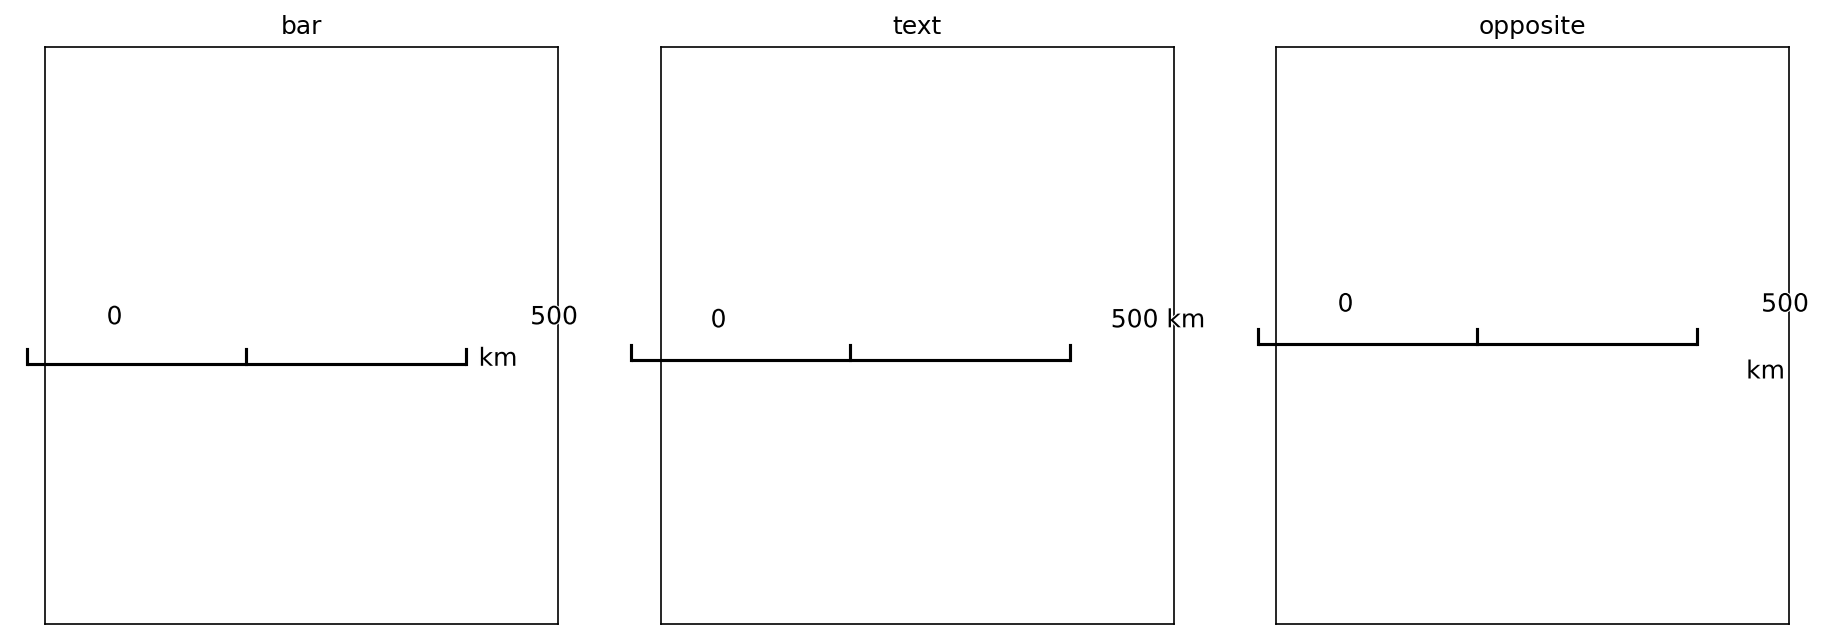

In [23]:
# This block will show the different label locations
# Creating 1x3 subplots
fig, axs = new_map(1,3, figsize=(15,5))
# Now we define the different label settings
modifications = [
    # Iterating through the label locations
    {"loc":"bar"},
    {"loc":"text"},
    {"loc":"opposite"}, # this one looks best when bar["minor_type"] = "last_only"
]
# We'll first iterate through each of the two minor_types
for ax,m in zip(axs.flatten(), modifications):
    states.query(f"NAME=='Georgia'").plot(ax=ax, color="white")
    ax.set_aspect(1, adjustable="datalim")
    scale_bar(ax=ax, location="center", style="ticks", labels={"style":"first_last"}, units=m,
                bar={"projection":3857,"max":500,"major_div":2,"minor_div":5,"minor_type":"none"})
    ax.set_title(m["loc"])

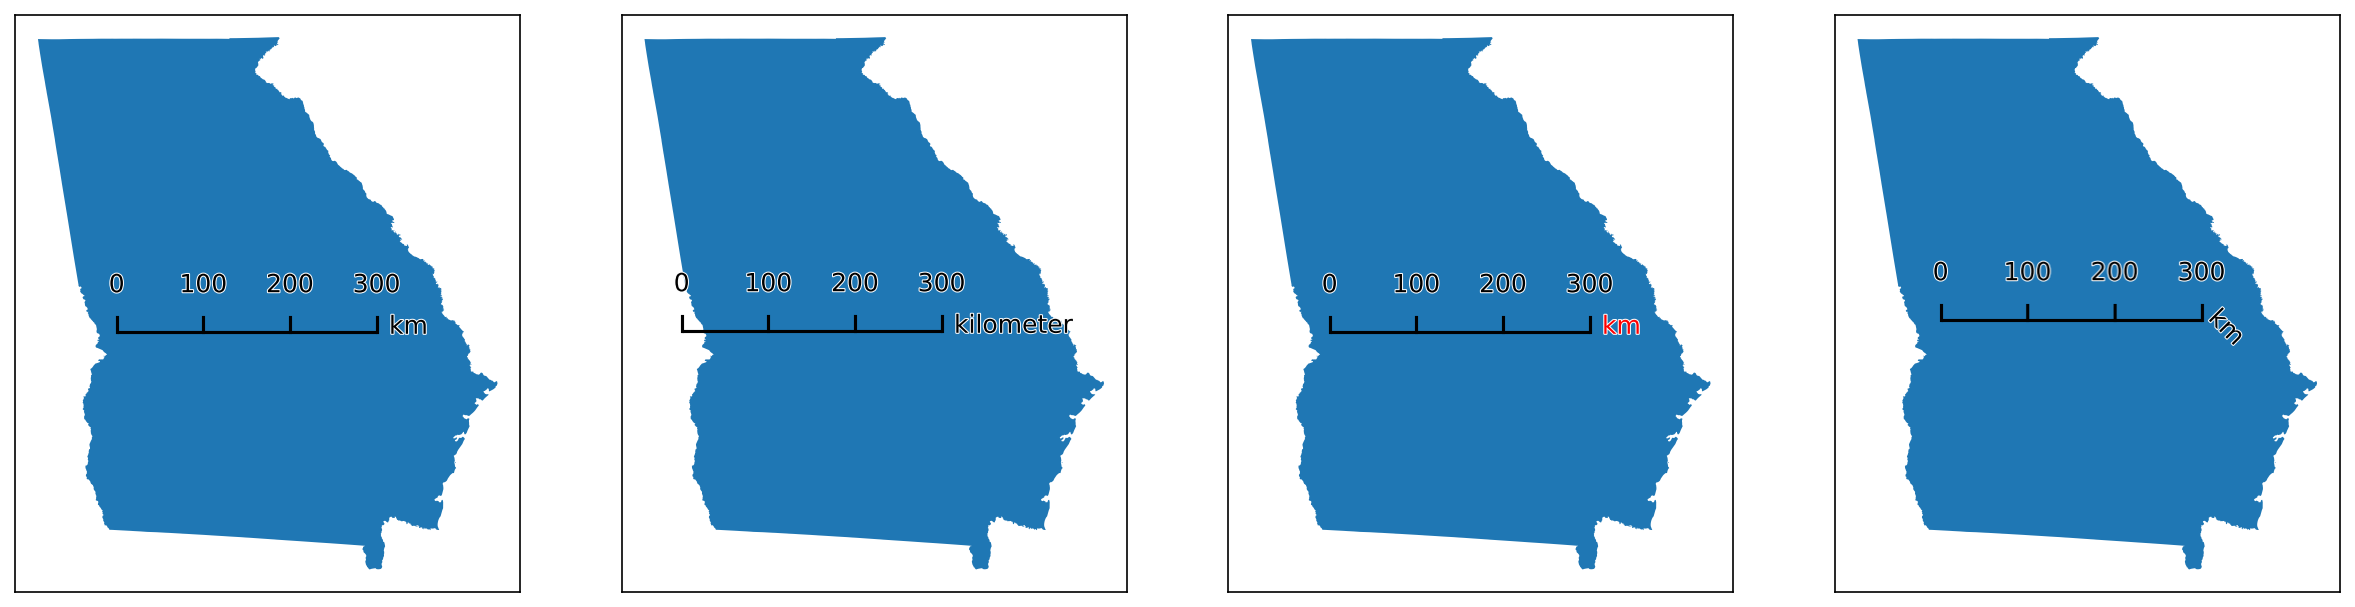

In [24]:
# Modifying other elements
modifications = [
    {}, # default for comparison
    {"label":"kilometer"},
    {"textcolor":"red"}, # changing the color of the units label, without affecting the other lables
    {"rotation":-45},
]
# Creating 1x4 subplots
fig, axs = new_map(1,4, figsize=(20,5))
for ax,m in zip(axs.flatten(), modifications):
    states.query(f"NAME=='Georgia'").plot(ax=ax)
    ax.set_aspect(1, adjustable="datalim")
    scale_bar(ax=ax, location="center", style="ticks", labels={"style":"major"}, units=m, # changed the style to major here
              bar={"projection":3857,"max":300,"major_div":3,"minor_div":1,"minor_type":"none"}) 

#### **Formatting Components**
There are two "invisible" components to the scale bar - so called because they are mainly there to help alter the position or formatting of the components, but are not directly tied to an individual component. I mainly keep this distinction to match the north arrow.

##### **Text**
`text` is a shorthand way of changing shared settings for the `label` and `units` *together*. This is useful, for example, if you want to change the fontsize, color, or family for both components, without having to set each setting twice.

* `fontsize`: The size of the text. Will accept any float, int, or string value (such as `small` or `xx-large`) - see matplotlib documentation for more details.

* `textcolor`: the color of the main text. Will accept any matplotlib color value. *Unlike the relevant setting in `label`, will only accept a single value to be used for all the text colors at once*.

* `fontfamily`: The appearance of the text - see matplotlib documentation for more details. Can be any of `serif`, `sans-serif`, `cursive`, `fantasy`, or `monospace`.

* `fontstyle`: The appearance of the text - see matplotlib documentation for more details. Can be any of `normal`, `italic`, or `oblique`.

* `fontweight`: The appearance of the text - see matplotlib documentation for more details. Can be any of `normal`, `bold`, `heavy`, `light`, `ultrabold`, or `ultralight`.

* `stroke_width`: The width of the outline of the text. Will accept any positive float or integer.

* `stroke_color`: The color of the outline of the text. Will accept any matplotlib color value.

* `rotation`: The rotation of the text in-place, expressed in degrees. Accepts values between -360 and 360. Works in tandem with `rotation_mode` (below).

* `rotation_mode`: Changes how the rotation of the text occurs. Recommend looking at matplotlib's documentation for details. Can be either `anchor` or `default`.

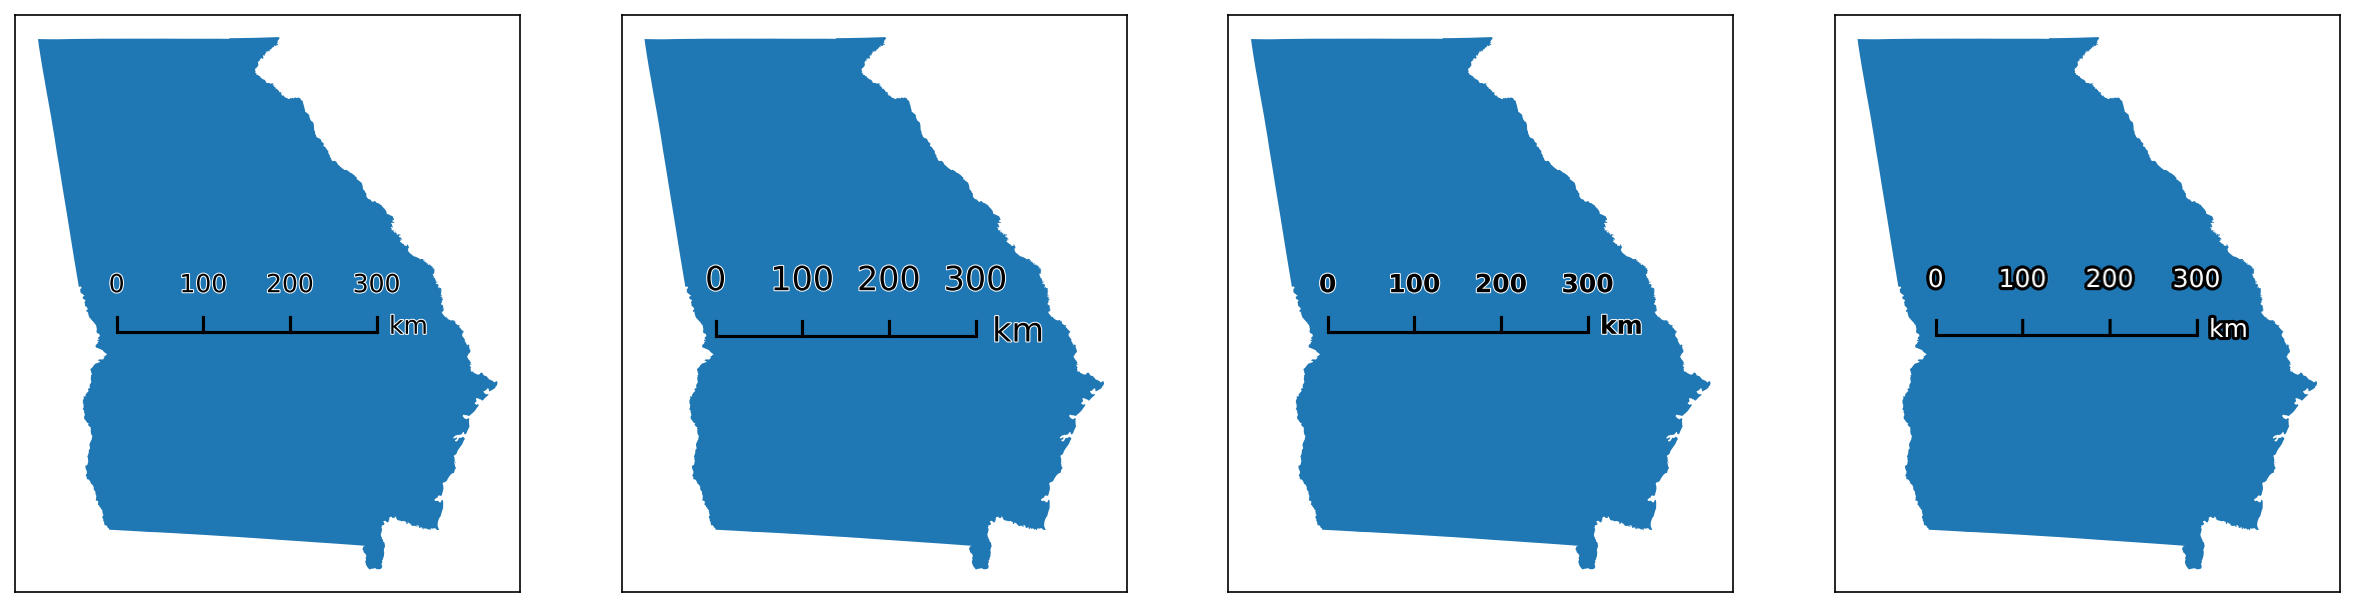

In [25]:
# Modifying specific elements
modifications = [
    {}, # default settings
    {"fontsize": 16}, # increased size
    {"fontweight": "bold"}, # different weight
    {"stroke_color": "black", "stroke_width":3, "textcolor": "white"}, # changing the mode, not a great example
]
# Creating four subplots
fig, axs = new_map(1,4, figsize=(20,5))
for ax,m in zip(axs.flatten(), modifications):
    states.query(f"NAME=='Georgia'").plot(ax=ax)
    ax.set_aspect(1, adjustable="datalim")
    scale_bar(ax=ax, location="center", style="ticks", labels={"style":"major"}, text=m,
              bar={"projection":3857,"max":300,"major_div":3,"minor_div":1,"minor_type":"none"}) 

##### **AOB**
`aob` customizes the [`AnchoredOffsetBox`](https://matplotlib.org/stable/api/offsetbox_api.html#matplotlib.offsetbox.AnchoredOffsetbox) object that handles the positioning of the final scale bar object with respect to the *plot*. Note that `facecolor`, `edgecolor`, and `alpha` are non-standard options.

* `facecolor`: The color of the `AnchoredOffsetBox` patch. Will accept any matplotlib color value.

* `edgecolor`: The color of the edge of the `AnchoredOffsetBox` patch. Will accept any matplotlib color value.

* `alpha`: The transparency of the `AnchoredOffsetBox` patch. Will accept any matplotlib color value.

* `pad`: The amount of padding around the north arrow, defining the edges of the `AnchoredOffsetBox`. Expressed as *a fraction of the fontsize specified in `prop`*. Will accept any positive float or integer.

* `borderpad`: The amount of padding between the `AnchoredOffsetBox` and the `bbox_to_anchor`, if one is specified. Expressed as *a fraction of the fontsize specified in `prop`*. Will accept any positive float or integer.

* `prop`: A reference fontsize used to define the paddings of `pad` and `borderpad`. Will accept any valid fontsize input.

* `frameon`: Whether or not to draw a frame around the box. Will accept either `True` or `False`.

* `bbox_to_anchor` and `bbox_transform`: Used to customize the placement of the `AnchoredOffsetBox`. See *Tips and Tricks* section for details.

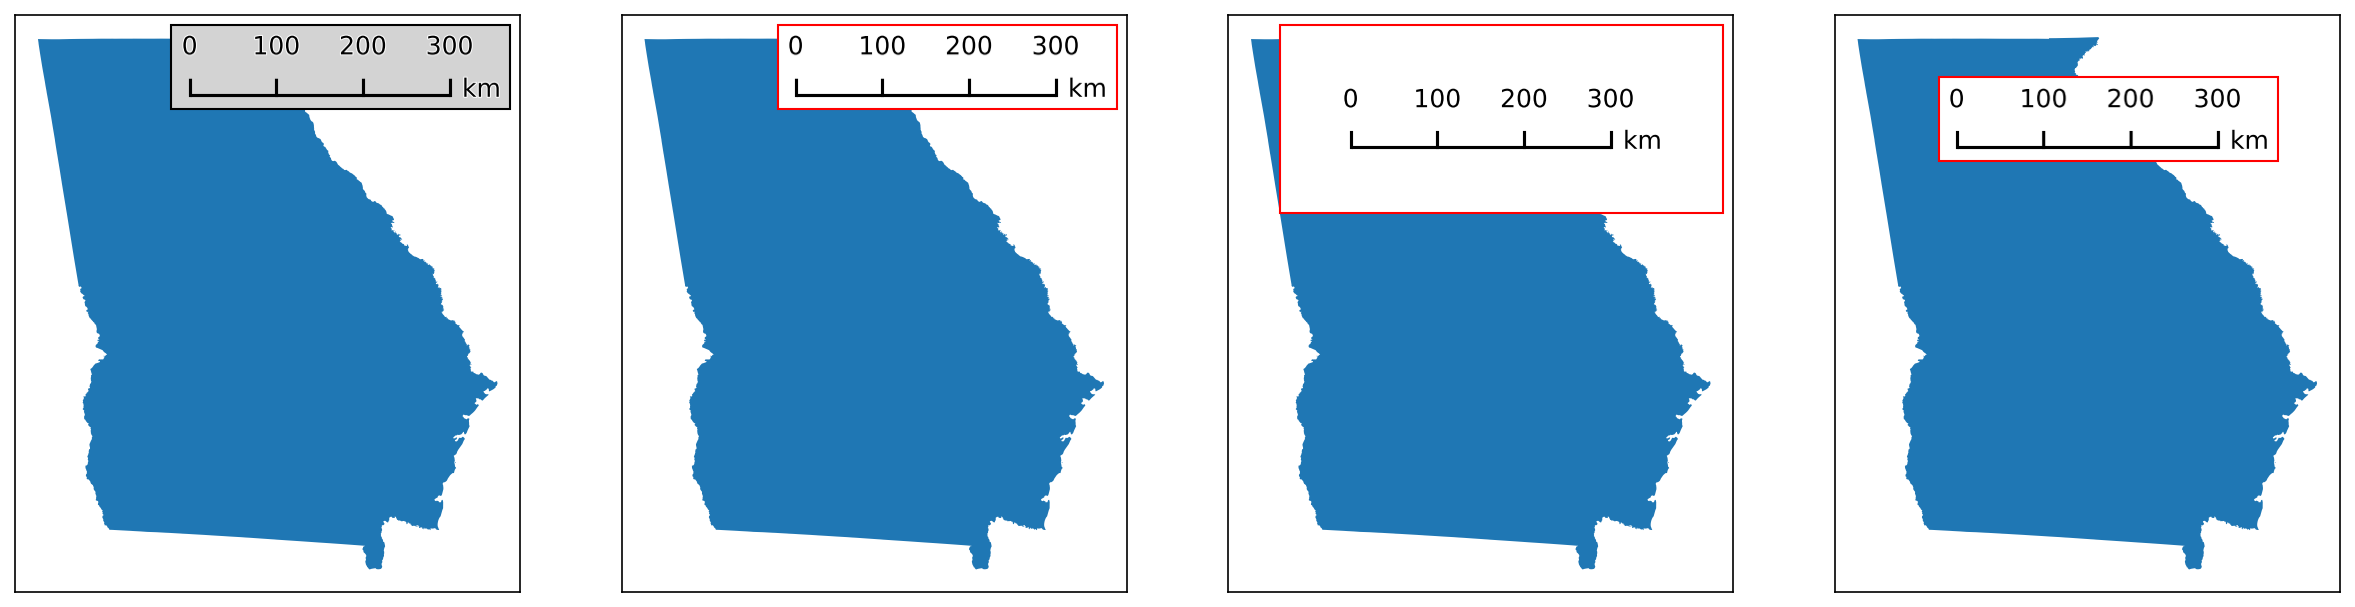

In [26]:
# Modifying specific elements
ScaleBar.set_size("md")
modifications = [
    {"facecolor": "lightgrey"}, # different facecolor
    {"edgecolor": "red"}, # different edgecolor; note that this automatically sets the facecolor to white
    # these two show the difference between pad and borderpad
    {"edgecolor": "red", "pad": 3}, # increased pad
    {"edgecolor": "red", "borderpad": 3}, # increased borderpad, which is "invisible" relative to where the edge is
]
# Creating four subplots
fig, axs = new_map(1,4, figsize=(20,5))
for ax,m in zip(axs.flatten(), modifications):
    states.query(f"NAME=='Georgia'").plot(ax=ax)
    ax.set_aspect(1, adjustable="datalim")
    scale_bar(ax=ax, location="upper right", style="ticks", labels={"style":"major"}, aob=m, # using location="upper right" to illustrate borderpad
              bar={"projection":3857,"max":300,"major_div":3,"minor_div":1,"minor_type":"none"}) 

### **Tips and Tricks**

#### Recreating matplotlib-scalebar
My initial inspiration for creating this package was [`matplotlib-scalebar`](https://github.com/ppinard/matplotlib-scalebar/tree/master), which has not been updated in a while, and I found insufficient for geographic needs in particular. However, for those who want to recreate the look of the scalebars created by the package, there is a trick for doing so: if `label["style"]=="last_only"` *and* `major_div==1` *and* `minor_div==1`, then the label will be drawn *centered* underneath the 1-div bar.

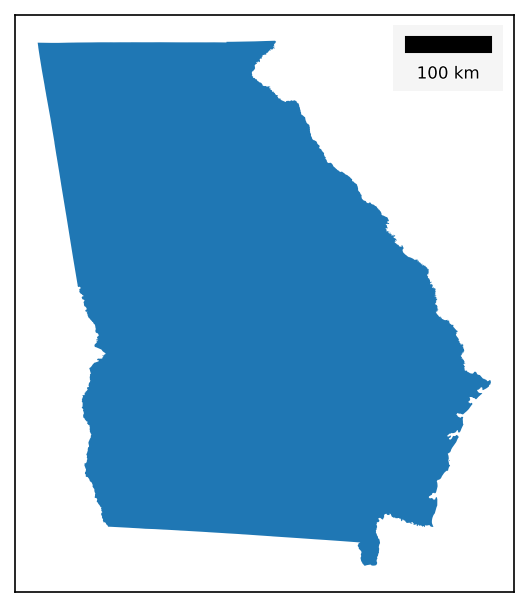

In [27]:
fig, ax = new_map(1,1, figsize=(5,5))
# Plotting the a state
states.query(f"NAME=='Georgia'").plot(ax=ax)
# Setting up the scale bar
scale_bar(ax=ax, location="upper right", style="boxes",
          bar={"projection":3857,"max":100,"major_div":1,"minor_div":1,"minor_type":"none"},
          labels={"style":"last_only","loc":"below","fontsize":8}, units={"loc":"text"},
          aob={"facecolor":"whitesmoke","edgecolor":"none","pad":0.5,"borderpad":0.5})

#### **Setting Size**
While the scale bar can nominally have its size changed by changing the `length` attribute, doing so doesn't change the other, related components, such as the sizes of the text, the shadow's offset, the stroke widths, and so on.

However, given that there are standardized paper sizes that most graphics are made towards, a specific function, `set_size()`, is provided that will batch-update the default values of the scale bar to approximate what looks best at each size. The function takes in only one input, which is the size you want to update the bar to be:

* `xsmall` or `xs` for A8 paper, ~2 to 3 inches

* `small` or `sm` for A6 paper, ~4 to 6 inches

* `medium` or `md` for A4 or letter paper, ~8 to 11 inches

* `large` or `lg` for A2 paper, ~16 to 24 inches

* `xlarge` or `xl` for A0 paper, ~33 to 48 inches

These default values can be seen in `defaults/scale_bar.py`.

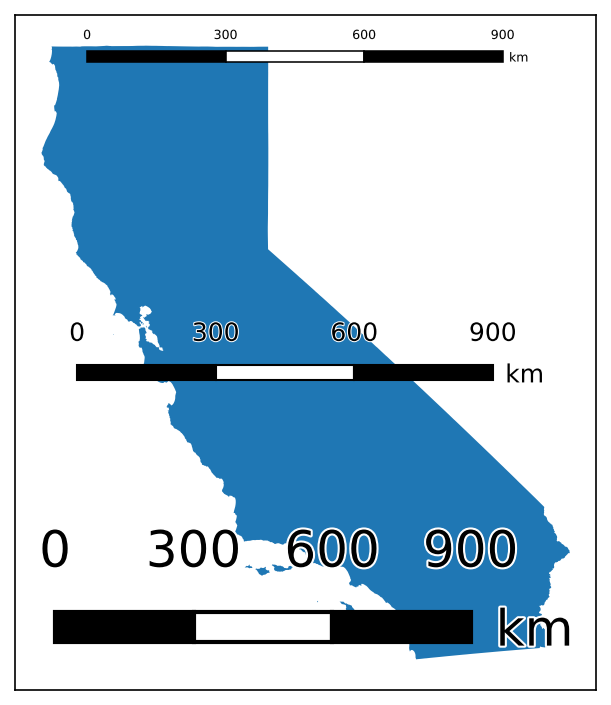

In [28]:
# For reference, this is 5 inches x 10 inches
fig, ax = new_map(1,1, figsize=(5,10))
# Plotting the a state
states.query(f"NAME=='California'").plot(ax=ax)
# Visualizing three different sizes at various positions
for s,l in zip(["sm","md","lg"], ["upper center", "center", "lower center"]):
    # Calling the function to update the defaults
    ScaleBar.set_size(size=s)
    scale_bar(ax=ax, location=l, style="boxes", labels={"style":"major"}, 
              bar={"projection":3857,"max":900,"major_div":3,"minor_div":1,"minor_type":"none"})

# Resetting the sizes
ScaleBar.set_size(size="sm")

#### **Placing Scale Bars Outside of Axis**
Sometimes it is more desireable to place the scale bar outside of the plot entirely, which can be accomplished using `bbox_to_anchor` and `bbox_transform` from the `aob`component settings. This works the same way it does for [`matplotlib.pyplot.legend`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html#matplotlib.pyplot.legend).

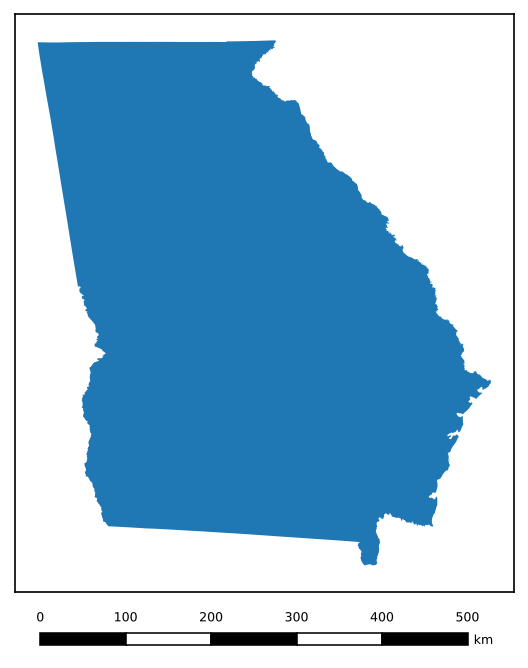

In [29]:
fig, ax = new_map()
states.query("NAME=='Georgia'").plot(ax=ax)
scale_bar(ax=ax, location="upper center", style="boxes", labels={"style":"major"}, 
              bar={"projection":3857,"max":500,"major_div":5,"minor_div":1,"minor_type":"none"}, 
              aob={"bbox_to_anchor":(0.5,-0.01), "bbox_transform":ax.transAxes})

#### **Dual Scale Bars**
One common form for scale bars is to present two of them side-by-side, with different units of measurement (such as kilometres and miles). This can be accomplished in two ways:

* Creating two bars using the `scale_bar()` function with `draw=False` and `return_aob=False`. Each function will return an [`OffsetImage`](https://matplotlib.org/stable/api/offsetbox_api.html#matplotlib.offsetbox.OffsetImage) object, which can be placed in a `VPacker` or `HPacker`, and the placed in a `AnchoredOffsetBox` to assist with positioning. Note that any settings passed to `aob` will be ignored!

* Using the function `dual_bars()`, which will perform the above automatically, though with more limited customization between the two bars: you can only change the `units`, `bar_max`, `bar_length`, `major_div`, and `minor_div` of the bars; all *formatting* elements must be the same. Note that this function is experimental, and is particularly prone to breaking when `rotation` is set to a value other than `0` - if people give feedback that it is useful, I will spend time cleaning it up!

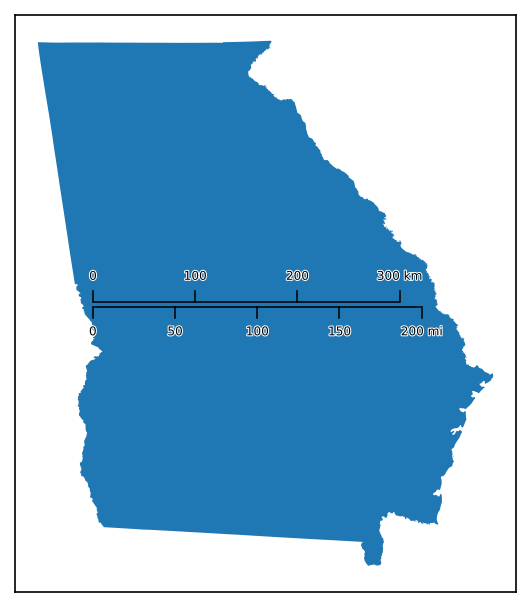

In [30]:
# Manual version
import matplotlib.offsetbox


fig, ax = new_map(1,1, figsize=(5,5))
_ = states.query("NAME=='Georgia'").to_crs(3520).plot(ax=ax)

# First the bar showing kilomtres
km = scale_bar(ax=ax, draw=False, return_aob=False, style="ticks", location="center",
               bar={"projection":3520,"unit":"km","max":300,"major_div":3,"minor_div":1,
                    "rotation":0,"reverse":False,"minor_type":"none"},
               labels={"style":"major"},
               units={"loc":"text"}, 
               text={"stroke_width":1,"stroke_color":"white","fontsize":"xx-small"})

# Then the bar showing miles
# Note that I have to MANUALLY change the location of the ticks and the lables
mi = scale_bar(ax=ax, draw=False, return_aob=False, style="ticks", location="center",
               bar={"projection":3520,"unit":"mi","max":200,"major_div":4,"minor_div":1,
                    "rotation":0,"reverse":False,"minor_type":"none","tick_loc":"below"},
               labels={"style":"major","loc":"below"},
               units={"loc":"text"}, 
               text={"stroke_width":1,"stroke_color":"white","fontsize":"xx-small"})

# Now, placing each OffsetImage inside of a VPacker
pack = matplotlib.offsetbox.VPacker(children=[km,mi], align="left", pad=0, sep=1.5)
# And placing that into an AnchoredOffsetBox
aob = matplotlib.offsetbox.AnchoredOffsetbox(loc="center", child=pack, frameon=False)
# And drawing it onto the axis
_ = ax.add_artist(aob)

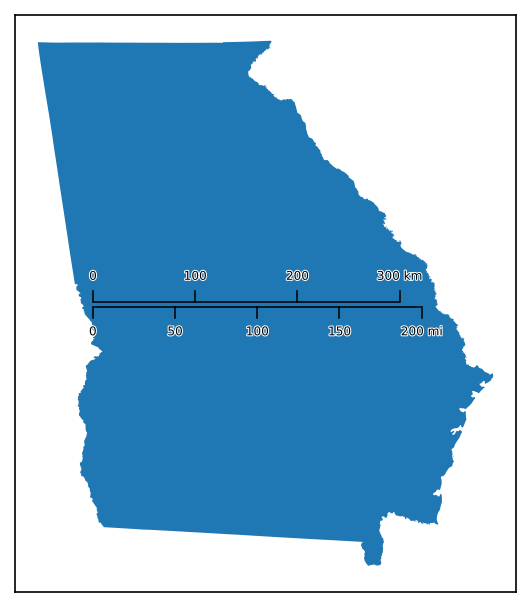

In [31]:
# Using dual_bars()
from matplotlib_map_utils.core.scale_bar import dual_bars

fig, ax = new_map(1,1, figsize=(5,5))
_ = states.query("NAME=='Georgia'").to_crs(3520).plot(ax=ax)

# Note that this handles the flipping of the ticks and labels automatically!
dual_bars(ax=ax, draw=True, style="ticks", location="center", 
          # For these settings, the first item in the list will apply to the top bar, and the second to the bottom
          units_dual=["km","mi"], bar_maxes=[300,200], major_divs=[3,4], minor_divs=[1,1], # you could set bar_length=[x,y] here too
          # These settings are shared among all the bars
          bar={"projection":3520,"rotation":0,"reverse":False,"minor_type":"none"},
          labels={"style":"major"},
          units={"loc":"text"}, 
          text={"stroke_width":1,"stroke_color":"white","fontsize":"xx-small"},
          # These settings are for the V/HPacker (see the manual example)
          sep=1.5, pad=0)

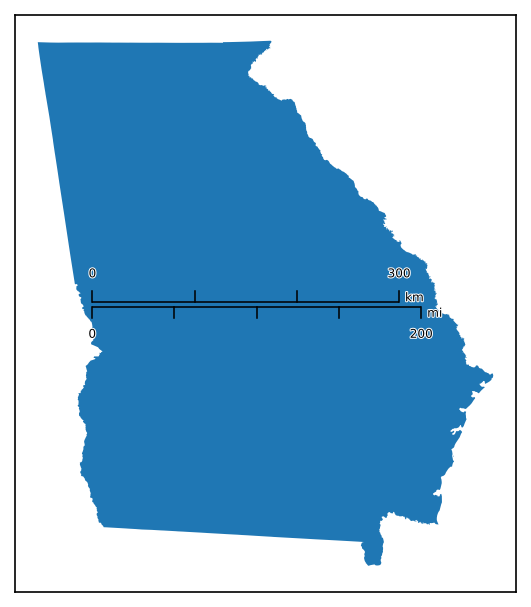

In [32]:
# Using dual_bars()
from matplotlib_map_utils.core.scale_bar import dual_bars

fig, ax = new_map(1,1, figsize=(5,5))
_ = states.query("NAME=='Georgia'").to_crs(3520).plot(ax=ax)

# Note that this handles the flipping of the ticks and labels automatically!
dual_bars(ax=ax, draw=True, style="ticks", location="center", 
          # For these settings, the first item in the list will apply to the top bar, and the second to the bottom
          units_dual=["km","mi"], bar_maxes=[300,200], major_divs=[3,4], minor_divs=[1,1], # you could set bar_length=[x,y] here too
          # These settings are shared among all the bars
          bar={"projection":3520,"rotation":0,"reverse":False,"minor_type":"none"},
        #   labels={"style":"major"},
        #   units={"loc":"text"}, 
          text={"stroke_width":1,"stroke_color":"white","fontsize":"xx-small"},
          # These settings are for the V/HPacker (see the manual example)
          sep=1.5, pad=0)

#### **Q: Why Can't I Access Artists That Comprise the Scale Bar?**

A: Unlike the North Arrow, the the `rotation` option is meant to affect *all* of the subcomponents: boxes/ticks and labels. As far as I can tell, this is not possible with an `AnchoredOffsetBox` (which contains all the subcomponents) placed inside of an `AuxTransformBox` (which can apply a rotation transformation) - I tried *many* times to debug this, if you know how to make it work then let me know.

Instead, I render the final box, pre-rotation, as an Image using matplotlib's `buffer_rgba()` on a temporary figure I constructed. This flattens everything, returning just the array of Image values that I then use to create an `OffsetImage()`, which is what is ultimately returned. See the function `render_as_image()` in `core.scale_bar.py` if you are interested to see how it works.